# **Machine Learning II | <span style="color: darkseagreen;">Exploratory Data Analysis and Pre-Processing</span>**

## Customer Segmentation: A Key to Unlocking Business Growth and Success

*Group 10*

*Group members* : Francisco Gomes (20221810), Maria Henriques (20221952) and Marta Almendra (20221878).


---------------------------

<a id="1"></a>

# **1. Importing the datasets and libraries <font>**

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from utils1 import (
    get_education_level_and_clean_name,
    calculate_percentage,
    customized_histograms,
    customized_bar_charts,
    customized_pie_charts,
    customized_scatter,
    filled_line_plot,
    plot_lifetime_spending,
    plot_correlation_matrix,
    plot_k_distance,
    detect_outliers_dbscan,
    visualize_outliers_vs_normal,
    high_correlations
)


#Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
ci = pd.read_csv("Data/customer_info.csv", index_col = 'customer_id')

<a id="1"></a>

# **2. Preliminary Data Analysis<font>**

In [63]:
pd.set_option('display.max_columns', None)
ci.sort_index(inplace = True)
display(ci.head())

customer_name  customer_gender  customer_age  kids_home  \
customer_id                                                                  
1            Kathleen Carmichael            False            48        1.0   
2                    Betty Smith            False            56        1.0   
3               Crystal Kitchens            False            66        1.0   
4                  Glenda Bauman            False            40        1.0   
5               Antonio Campbell             True            32        1.0   

             teens_home  number_complaints  distinct_stores_visited  \
customer_id                                                           
1                   1.0                0.0                      1.0   
2                   0.0                0.0                      NaN   
3                   1.0                0.0                      1.0   
4                   1.0                1.0                      3.0   
5                   2.0                1.0                      3.0   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
1                              2795.0                       169.0   
2                              4123.0                       730.0   
3                             16197.0                      8942.0   
4                              3836.0                       403.0   
5                              5401.0                      3246.0   

             typical_hour  lifetime_spend_vegetables  \
customer_id                                            
1                     9.0                     1091.0   
2                    14.0                     1176.0   
3                    16.0                      416.0   
4                    17.0                      294.0   
5                     8.0                      162.0   

             lifetime_spend_nonalcohol_drinks  lifetime_spend_alcohol_drinks  \
customer_id                                                                    
1                                       134.0                           27.0   
2                                       479.0                           93.0   
3                                       912.0                         1674.0   
4                                       485.0                          162.0   
5                                       516.0                          533.0   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
1                            1.0                  1.0                   697.0   
2                            1.0                  2.0                   533.0   
3                         2341.0               4333.0                  2543.0   
4                          247.0                253.0                   102.0   
5                         1393.0               1817.0                  1845.0   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                                      
1                                314.0                   486.0   
2                                123.0                   334.0   
3                               3942.0                  3309.0   
4                                605.0                   306.0   
5                               1003.0                  1778.0   

             lifetime_total_distinct_products  \
customer_id                                     
1                                       165.0   
2                                       347.0   
3                                       152.0   
4                                         4.0   
5                                      1318.0   

             percentage_of_products_bought_promotion  customer_tenure  \
customer_id                                                             
1              

<a id="1"></a>

### **2.1. Removing Column <font>**

Noticed an unsual column *'Unnamed'* with no relevant information, which we decided to drop.

In [4]:
display(ci.columns)

Index(['Unnamed: 0', 'customer_name', 'customer_gender', 'customer_birthdate',
       'kids_home', 'teens_home', 'number_complaints',
       'distinct_stores_visited', 'lifetime_spend_groceries',
       'lifetime_spend_electronics', 'typical_hour',
       'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks',
       'lifetime_spend_alcohol_drinks', 'lifetime_spend_meat',
       'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'loyalty_card_number', 'latitude', 'longitude'],
      dtype='object')

In [5]:
ci = ci.drop(columns=['Unnamed: 0'])

<a id="1"></a>

### **2.2. Data Types <font>**

In [6]:
# Check the data types and memory usage
display(ci.info(memory_usage="deep"))

<class 'pandas.core.frame.DataFrame'>
Index: 43631 entries, 1 to 50000
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_name                            43631 non-null  object 
 1   customer_gender                          43631 non-null  object 
 2   customer_birthdate                       43631 non-null  object 
 3   kids_home                                43107 non-null  float64
 4   teens_home                               42610 non-null  float64
 5   number_complaints                        42977 non-null  float64
 6   distinct_stores_visited                  42322 non-null  float64
 7   lifetime_spend_groceries                 43631 non-null  float64
 8   lifetime_spend_electronics               43631 non-null  float64
 9   typical_hour                             41886 non-null  float64
 10  lifetime_spend_vegetables                42758 non-

None

<a id="1"></a>

### **2.3. Missing Values <font>**

In [7]:
display('Number of missing values in each column:')

display(ci.isnull().sum())

'Number of missing values in each column:'

customer_name                                  0
customer_gender                                0
customer_birthdate                             0
kids_home                                    524
teens_home                                  1021
number_complaints                            654
distinct_stores_visited                     1309
lifetime_spend_groceries                       0
lifetime_spend_electronics                     0
typical_hour                                1745
lifetime_spend_vegetables                    873
lifetime_spend_nonalcohol_drinks               0
lifetime_spend_alcohol_drinks                  0
lifetime_spend_meat                            0
lifetime_spend_fish                         1309
lifetime_spend_hygiene                         0
lifetime_spend_videogames                      0
lifetime_spend_petfood                         0
lifetime_total_distinct_products               0
percentage_of_products_bought_promotion        0
year_first_transacti

To gain a clearer insight, we opted to calculate the **percentage of missing values** in each variable that contains them, aiming to better comprehend their impact on the dataset.

In [8]:
missing_columns = ['kids_home', 'teens_home', 'number_complaints', 'distinct_stores_visited', 'typical_hour', 'lifetime_spend_vegetables', 'lifetime_spend_fish', 'loyalty_card_number']
missing_percentages = calculate_percentage(ci, columns=missing_columns)

for col, percent in missing_percentages.items():
    display(f'Around {percent}% of the data points in the column {col} are missing values')

'Around 1.2% of the data points in the column kids_home are missing values'

'Around 2.3% of the data points in the column teens_home are missing values'

'Around 1.5% of the data points in the column number_complaints are missing values'

'Around 3.0% of the data points in the column distinct_stores_visited are missing values'

'Around 4.0% of the data points in the column typical_hour are missing values'

'Around 2.0% of the data points in the column lifetime_spend_vegetables are missing values'

'Around 3.0% of the data points in the column lifetime_spend_fish are missing values'

'Around 43.5% of the data points in the column loyalty_card_number are missing values'

Since we're working on an unsupervised learning project, being careful with how we deal with missing data is really important and can significantly **influence the quality of clusters formed**. 

Seeing that no single variable had over **50%** of its data missing, we figured it **wouldn't make sense to just get rid of any variables**.

Generally, the missing values across various features maintain a consistent percentage, with the exception of the **loyalty_card_number** attribute, which exhibits a notably high missing rate of **43.5%**. This represents a significant proportion when compared to the other variables.

Our decision was to only treat the missing data at the end of the Exploratory Data Analysis.

<a id="1"></a>

### **2.4. Summary Statistics - (numerical data) <font>**

In [9]:
ci.describe().T

count           mean           std  \
kids_home                                43107.0       1.081263      1.239257   
teens_home                               42610.0       0.847829      0.840397   
number_complaints                        42977.0       0.705726      0.624624   
distinct_stores_visited                  42322.0       1.669959      1.034825   
lifetime_spend_groceries                 43631.0    5600.030047   4602.647746   
lifetime_spend_electronics               43631.0    2000.058468   3004.924537   
typical_hour                             41886.0      13.520580      4.558057   
lifetime_spend_vegetables                42758.0     456.893938    312.832282   
lifetime_spend_nonalcohol_drinks         43631.0     443.636657    210.313287   
lifetime_spend_alcohol_drinks            43631.0     494.073365    524.269783   
lifetime_spend_meat                      43631.0     709.367949    678.288845   
lifetime_spend_fish                      42322.0    1471.423846   3910.163766   
lifetime_spend_hygiene                   43631.0     916.948408    729.744050   
lifetime_spend_videogames                43631.0     990.334922   1241.658577   
lifetime_spend_petfood                   43631.0    2023.225619   2926.355387   
lifetime_total_distinct_products         43631.0     387.260182    411.436756   
percentage_of_products_bought_promotion  43631.0       0.229431      0.189242   
year_first_transaction                   43631.0    2011.342257      4.656129   
loyalty_card_number                      24654.0  949808.661069  28894.251301   
latitude                                 43631.0      38.752266      0.048629   
longitude                                43631.0      -9.158591      0.036606   

                                                   min            25%  \
kids_home                                     0.000000       0.000000   
teens_home                                    0.000000       0.000000   
number_complaints                             0.000000       0.000000   
distinct_stores_visited                       1.000000       1.000000   
lifetime_spend_groceries                      0.000000    2184.500000   
lifetime_spend_electronics                    0.000000     218.000000   
typical_hour                                  6.000000      10.000000   
lifetime_spend_vegetables                     0.000000     227.000000   
lifetime_spend_nonalcohol_drinks              0.000000     297.000000   
lifetime_spend_alcohol_drinks                 0.000000     145.000000   
lifetime_spend_meat                           0.000000     153.000000   
lifetime_spend_fish                           0.000000     187.000000   
lifetime_spend_hygiene                        0.000000     372.000000   
lifetime_spend_videogames                     0.000000     204.000000   
lifetime_spend_petfood                        0.000000     517.000000   
lifetime_total_distinct_products              0.000000      97.000000   
percentage_of_products_bought_promotion      -0.477986       0.111704   
year_first_transaction                     1996.000000    2008.000000   
loyalty_card_number                      900008.000000  924774.000000   
latitude                                     38.690636      38.732481   
longitude                                    -9.418076      -9.175824   

                                                   50%            75%  \
kids_home                                     1.000000       1.000000   
teens_home                                    1.000000       1.000000   
number_complaints                             1.000000       1.000000   
distinct_stores_visited                       1.000000       2.000000   
lifetime_spend_groceries                   4071.000000    6605.500000   
lifetime_spend_electronics                  574.000000    2565.500000   
typical_hour                                 13.000000      17.000000   
lifetime_spend_vegetables                   387.000000     584.000000

**Lifetime Columns**: The mean is significantly higher than the median (50% percentile). This suggests a right-skewed distribution, where a few customers have very high spending that raises the average.

**Percentage Variables**: The column percentage_of_products_bought_promotion has a minimum value of approximately -0.478 and a maximum of around 1.197. Percentages usually range from 0 to 1 (or 0% to 100%), so values outside this range are likely errors or data entry issues.

In [10]:
## Filter the DataFrame for rows with 'percentage_of_products_bought_promotion' outside the 0.0 to 1.0 range
out_of_range_rows = ci[(ci['percentage_of_products_bought_promotion'] < 0.0) | (ci['percentage_of_products_bought_promotion'] > 1.0)]

# Filter the DataFrame for rows with 'percentage_of_products_bought_promotion' outside the 0.0 to 1.0 range
out_of_range_condition = (ci['percentage_of_products_bought_promotion'] < 0.0) | (ci['percentage_of_products_bought_promotion'] > 1.0)

display(calculate_percentage(ci, condition= out_of_range_condition))
display(out_of_range_rows.head())

'Percentage of rows meeting the condition: 7.68%'

customer_name customer_gender   customer_birthdate  \
customer_id                                                               
12            Bsc. Dorothy Pacheco          female  01/14/2001 10:59 AM   
19               Msc. Evelyn Quinn          female  09/25/1942 01:20 PM   
20           Msc. Arlene Hernandez          female  01/14/1975 10:48 AM   
40                 Msc. Madge Bell          female  03/02/1971 01:59 AM   
61              Phd. Mildred Jones          female  11/02/1944 03:50 PM   

             kids_home  teens_home  number_complaints  \
customer_id                                             
12                 0.0         0.0                0.0   
19                 1.0         1.0                1.0   
20                 3.0         1.0                1.0   
40                 1.0         1.0                1.0   
61                 1.0         1.0                1.0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
12                               1.0                     923.0   
19                               2.0                   20187.0   
20                               2.0                    3405.0   
40                               2.0                    3110.0   
61                               1.0                   11653.0   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
12                                520.0          22.0  ...   
19                               3818.0          15.0  ...   
20                               2679.0          16.0  ...   
40                                724.0           7.0  ...   
61                               2457.0           9.0  ...   

             lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                
12                         397.0                   371.0   
19                        3928.0                  1953.0   
20                        1195.0                  1467.0   
40                         408.0                   574.0   
61                        4480.0                  2252.0   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                                      
12                               277.0                   109.0   
19                              3962.0                  3218.0   
20                              1147.0                   918.0   
40                               423.0                  1448.0   
61                              4458.0                  2730.0   

             lifetime_total_distinct_products  \
customer_id                                     
12                                      143.0   
19                                       79.0   
20                                      234.0   
40                                      683.0   
61                                      121.0   

             percentage_of_products_bought_promotion  year_first_transaction  \
customer_id                                                                    
12                                         -0.128970                  2024.0   
19                                         -0.096802                  2012.0   
20                                         -0.039925                  2012.0   
40                                         -0.181643                  2011.0   
61                                         -0.039008                  2008.0   

             loyalty_card_number   latitude  longitude  
customer_id                                             
12                      913727.0  38.739713  -9.161406  
19                      935337.0  38.737411  -9.149539  
20                      977085.0  38.795808  -9.202230  
40                      956566.0  38.748310  -9.185616  
61                      982385.0  38.759496  -9.166287  

[5 rows 

Upon discovering that **7.68%** of our dataset's entries have **percentage_of_products_bought_promotion** values deviating from the expected range of **0.0 to 1.0**, we chose to adopt a **Threshold Method** for correction. This adjustment was strategically made in the latter sections of our notebook, specifically in the feature engineering and transformation phase.

<a id="1"></a>

### **2.5. Findings in the Categorical Data <font>**

In [11]:
ci[["customer_name"]]

customer_name
customer_id                          
1            Msc. Kathleen Carmichael
2                    Msc. Betty Smith
3               Bsc. Crystal Kitchens
4                  Msc. Glenda Bauman
5               Bsc. Antonio Campbell
...                               ...
49996               Rosaura Polsgrove
49997               Salvador Pedersen
49998                  Kenneth Penney
49999                   Shayla Nanasy
50000                   Joey Atkinson

[43631 rows x 1 columns]

It is possible to see the level of education of each customer by looking at the ones with a degree preceding their name.
   - Levels of education : **'Bsc.'**, **'Msc.'**, **'Phd.'** 
   - Customers with just their name - assumed only had secondary education and no additional degree
    Knowing this we were able to create a new variable to help in further steps of the project.

In [12]:
fishy_count = ci['customer_name'].str.contains('Fishy').sum()
display(f'Number of rows with "Fishy" in the customer name: {fishy_count}')

'Number of rows with "Fishy" in the customer name: 388'

We observed a considerable number of instances where the term **"Fishy"** appears within the customer name entries. To conduct a more detailed investigation, we've scheduled an in-depth examination of these occurrences for the **data segmentation** phase of our analysis later in the notebook.

<a id="1"></a>

# **3. Feature Transformation and Engineering<font>**

#### **customer_age**

In [13]:
# Convert customer birthdate to age in years
ci['customer_birthdate'] = pd.to_datetime(ci['customer_birthdate'], format = '%m/%d/%Y %I:%M %p')
ci.rename(columns = {'customer_birthdate': 'customer_age'}, inplace = True)
ci['customer_age'] = datetime.now().year - ci['customer_age'].dt.year

#### **customer_loyalty**

In [14]:
# Convert loyalty card number to binary indicator variable for whether customer has a loyalty card
ci.rename(columns = {'loyalty_card_number': 'customer_loyalty'}, inplace = True)
ci['customer_loyalty'] = ci['customer_loyalty'].fillna(0).apply(lambda x: 1 if x != 0 else 0)

#### **customer_gender** - corrected

In [15]:
#Convert customer gender to binary (0 -> Female, 1 -> Male)
ci['customer_gender'] = pd.get_dummies(ci['customer_gender']).iloc[:,1]

#### **percentage_spend_columns** and **total_spend**

In [16]:
# Extract columns that contain 'lifetime_spend' to analyze spending patterns
spends = ci.columns[ci.columns.str.contains('lifetime_spend')]

# Calculate the total spend by summing the 'lifetime_spend' columns for each customer
ci['total_spend'] = ci[spends].sum(axis=1)

# Calculate the percentage spend for each 'lifetime_spend' category
for spend_column in spends:
    # Define the new column name for the percentage spend
    percentage_column = f'percentage_{spend_column}'
    
    # Calculate the percentage spend by dividing the spend column by the total lifetime spend
    # Avoid division by zero by adding a small number (e.g., 0.01) to the denominator
    ci[percentage_column] = ci[spend_column] / (ci['total_spend'] + 0.01)

#### **percentage_of_products_bought_promotion** - corrected

In [17]:
ci["percentage_of_products_bought_promotion"] = ci["percentage_of_products_bought_promotion"].apply(lambda x: max(min(x, 1.0), 0.0))

#### **customer_education**

In [18]:
results = ci.apply(get_education_level_and_clean_name, axis=1)

# The results will be a Series of tuples, so you need to convert these to separate Series for each part.
ci['customer_education'], ci['customer_name'] = zip(*results)

#### **customer_tenure**

In [19]:
# Convert year of first transaction to customer tenure in years
ci.rename(columns = {'year_first_transaction': 'customer_tenure'}, inplace = True)
ci['customer_tenure'] = datetime.now().year - ci['customer_tenure']

#### **dietary_preferences**

In [20]:
# Define conditions and corresponding values
conditions = [
    (ci['lifetime_spend_fish'] > 0) & (ci['lifetime_spend_meat'] == 0),
    (ci['lifetime_spend_meat'] > 0) & (ci['lifetime_spend_fish'] == 0),
    (ci['lifetime_spend_fish'] > 0) & (ci['lifetime_spend_meat'] > 0),
    (ci['lifetime_spend_fish'] == 0) & (ci['lifetime_spend_meat'] == 0)]

choices = ['Only Fish', 'Only Meat', 'Fish and Meat', 'No Fish or Meat']

# Use numpy.select() to assign values based on conditions
ci['dietary_preferences'] = np.select(conditions, choices, default='Unknown')

# Drop rows with 'Unknown' dietary preferences
ci = ci[ci['dietary_preferences'] != 'Unknown']

<a id="1"></a>

# **4. Data Segmentation and Cleansing<font>**

<a id="1"></a>

### **4.1. Dividing the Data <font>**

In [21]:
# Create a new DataFrame with selected columns from customer_info
customer_location = ci.loc[:, ['customer_name', 'latitude', 'longitude']].copy()

In [22]:
# Plotly scatter plot on a map
fig = px.scatter_mapbox(ci, lat="latitude", lon="longitude", hover_name="customer_name",
                        zoom=6, height=400)
fig.update_layout(mapbox_style="open-street-map", margin = dict(l=0,r=0,t=0,b=0))
fig.show()

Most values **outside of the Lisbon area**, are customers with **Fishy** in their name. 

This could mean that:

- **Segmentation Opportunity**: This could present an opportunity for regional market segmentation. If "Fishy" indicates a group with specific characteristics, preferences, or behaviors, these customers could be targeted with specialized marketing campaigns.

- **Data Collection Bias**: It might represent a bias in how data was collected or recorded, indicating that the dataset might not be completely representative of the customer base.

In [23]:
# Create a new DataFrame 'supermarkets' containing customers with names containing 'Supermarket'
fishy = ci[ci['customer_name'].str.contains('Fishy')].copy()

# Create a new DataFrame 'people' containing customers without names containing 'Supermarket'
persons = ci[~ci['customer_name'].str.contains('Fishy')].copy()

We decided to segregate the customers into **two distinct DataFrames** based on the presence of **'Fishy'** in their names, which allows for a more nuanced analysis. By doing so, we can uncover and address unique patterns and behaviors that may be specific to each subgroup. 

This step is critical for ensuring that any insights or strategies developed are relevant and effective for **each distinct customer group** within the dataset.


<a id="1"></a>

### **4.2. Persons Data <font>**

In [24]:
persons.head()

customer_name  customer_gender  customer_age  kids_home  \
customer_id                                                                  
1            Kathleen Carmichael            False            48        1.0   
2                    Betty Smith            False            56        1.0   
3               Crystal Kitchens            False            66        1.0   
4                  Glenda Bauman            False            40        1.0   
5               Antonio Campbell             True            32        1.0   

             teens_home  number_complaints  distinct_stores_visited  \
customer_id                                                           
1                   1.0                0.0                      1.0   
2                   0.0                0.0                      NaN   
3                   1.0                0.0                      1.0   
4                   1.0                1.0                      3.0   
5                   2.0                1.0                      3.0   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
1                              2795.0                       169.0   
2                              4123.0                       730.0   
3                             16197.0                      8942.0   
4                              3836.0                       403.0   
5                              5401.0                      3246.0   

             typical_hour  ...  percentage_lifetime_spend_vegetables  \
customer_id                ...                                         
1                     9.0  ...                              0.190901   
2                    14.0  ...                              0.154859   
3                    16.0  ...                              0.009325   
4                    17.0  ...                              0.043926   
5                     8.0  ...                              0.009156   

             percentage_lifetime_spend_nonalcohol_drinks  \
customer_id                                                
1                                               0.023447   
2                                               0.063076   
3                                               0.020444   
4                                               0.072464   
5                                               0.029162   

             percentage_lifetime_spend_alcohol_drinks  \
customer_id                                             
1                                            0.004724   
2                                            0.012246   
3                                            0.037526   
4                                            0.024204   
5                                            0.030123   

             percentage_lifetime_spend_meat  percentage_lifetime_spend_fish  \
customer_id                                                                   
1                                  0.000175                        0.000175   
2                                  0.000132                        0.000263   
3                                  0.052478                        0.097133   
4                                  0.036904                        0.037801   
5                                  0.078727                        0.102690   

             percentage_lifetime_spend_hygiene  \
customer_id                                      
1                                     0.121960   
2                                     0.070187   
3                                     0.057006   
4                                     0.015240   
5                                     0.104273   

             percentage_lifetime_spend_videogames  \
customer_id                                         
1                                        0.054943   
2                                        0.016197   
3                                        0.0883

### 4.2.1. Data types and Summary Statistics

In [25]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41943 entries, 1 to 50000
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   customer_name                                41943 non-null  object 
 1   customer_gender                              41943 non-null  bool   
 2   customer_age                                 41943 non-null  int32  
 3   kids_home                                    41437 non-null  float64
 4   teens_home                                   40949 non-null  float64
 5   number_complaints                            41318 non-null  float64
 6   distinct_stores_visited                      40690 non-null  float64
 7   lifetime_spend_groceries                     41943 non-null  float64
 8   lifetime_spend_electronics                   41943 non-null  float64
 9   typical_hour                                 40262 non-null  float64
 10  lif

In [26]:
persons.describe().T

count          mean  \
customer_age                                 41943.0     53.052881   
kids_home                                    41437.0      1.090113   
teens_home                                   40949.0      0.855015   
number_complaints                            41318.0      0.706811   
distinct_stores_visited                      40690.0      1.676284   
lifetime_spend_groceries                     41943.0   5524.906635   
lifetime_spend_electronics                   41943.0   2018.298739   
typical_hour                                 40262.0     13.554717   
lifetime_spend_vegetables                    41097.0    457.401173   
lifetime_spend_nonalcohol_drinks             41943.0    444.777770   
lifetime_spend_alcohol_drinks                41943.0    497.658847   
lifetime_spend_meat                          41943.0    715.107193   
lifetime_spend_fish                          41943.0   1122.104809   
lifetime_spend_hygiene                       41943.0    924.235534   
lifetime_spend_videogames                    41943.0    999.479317   
lifetime_spend_petfood                       41943.0   2038.619913   
lifetime_total_distinct_products             41943.0    389.927950   
percentage_of_products_bought_promotion      41943.0      0.233295   
customer_tenure                              41943.0     12.653363   
customer_loyalty                             41943.0      0.563312   
latitude                                     41943.0     38.748540   
longitude                                    41943.0     -9.156424   
total_spend                                  41943.0  14733.364042   
percentage_lifetime_spend_groceries          41943.0      0.377089   
percentage_lifetime_spend_electronics        41943.0      0.105625   
percentage_lifetime_spend_vegetables         41097.0      0.052422   
percentage_lifetime_spend_nonalcohol_drinks  41943.0      0.042101   
percentage_lifetime_spend_alcohol_drinks     41943.0      0.045337   
percentage_lifetime_spend_meat               41943.0      0.049932   
percentage_lifetime_spend_fish               41943.0      0.067591   
percentage_lifetime_spend_hygiene            41943.0      0.074217   
percentage_lifetime_spend_videogames         41943.0      0.061701   
percentage_lifetime_spend_petfood            41943.0      0.125042   
customer_education                           41943.0      0.471354   

                                                      std          min  \
customer_age                                    18.020635    23.000000   
kids_home                                        1.240307     0.000000   
teens_home                                       0.840658     0.000000   
number_complaints                                0.624048     0.000000   
distinct_stores_visited                          1.038117     1.000000   
lifetime_spend_groceries                      4552.463292     0.000000   
lifetime_spend_electronics                    3017.039756     0.000000   
typical_hour                                     4.550054     6.000000   
lifetime_spend_vegetables                      313.059594     0.000000   
lifetime_spend_nonalcohol_drinks               210.623516     0.000000   
lifetime_spend_alcohol_drinks                  525.256907     0.000000   
lifetime_spend_meat                            679.099756     0.000000   
lifetime_spend_fish                           1290.804390     0.000000   
lifetime_spend_hygiene                         729.023111     0.000000   
lifetime_spend_videogames                     1244.384213     0.000000   
lifetime_spend_petfood                        2929.019993     0.000000   
lifetime_total_distinct_products               410.925251     0.000000   
percentage_of_products_bought_promotion          0.179301     0.000000   
customer_tenure                                  4.660986     0.000000   
customer_loyalty                                 0.495981     0.000000   
latitude                                  

### 4.2.2. Visualizations

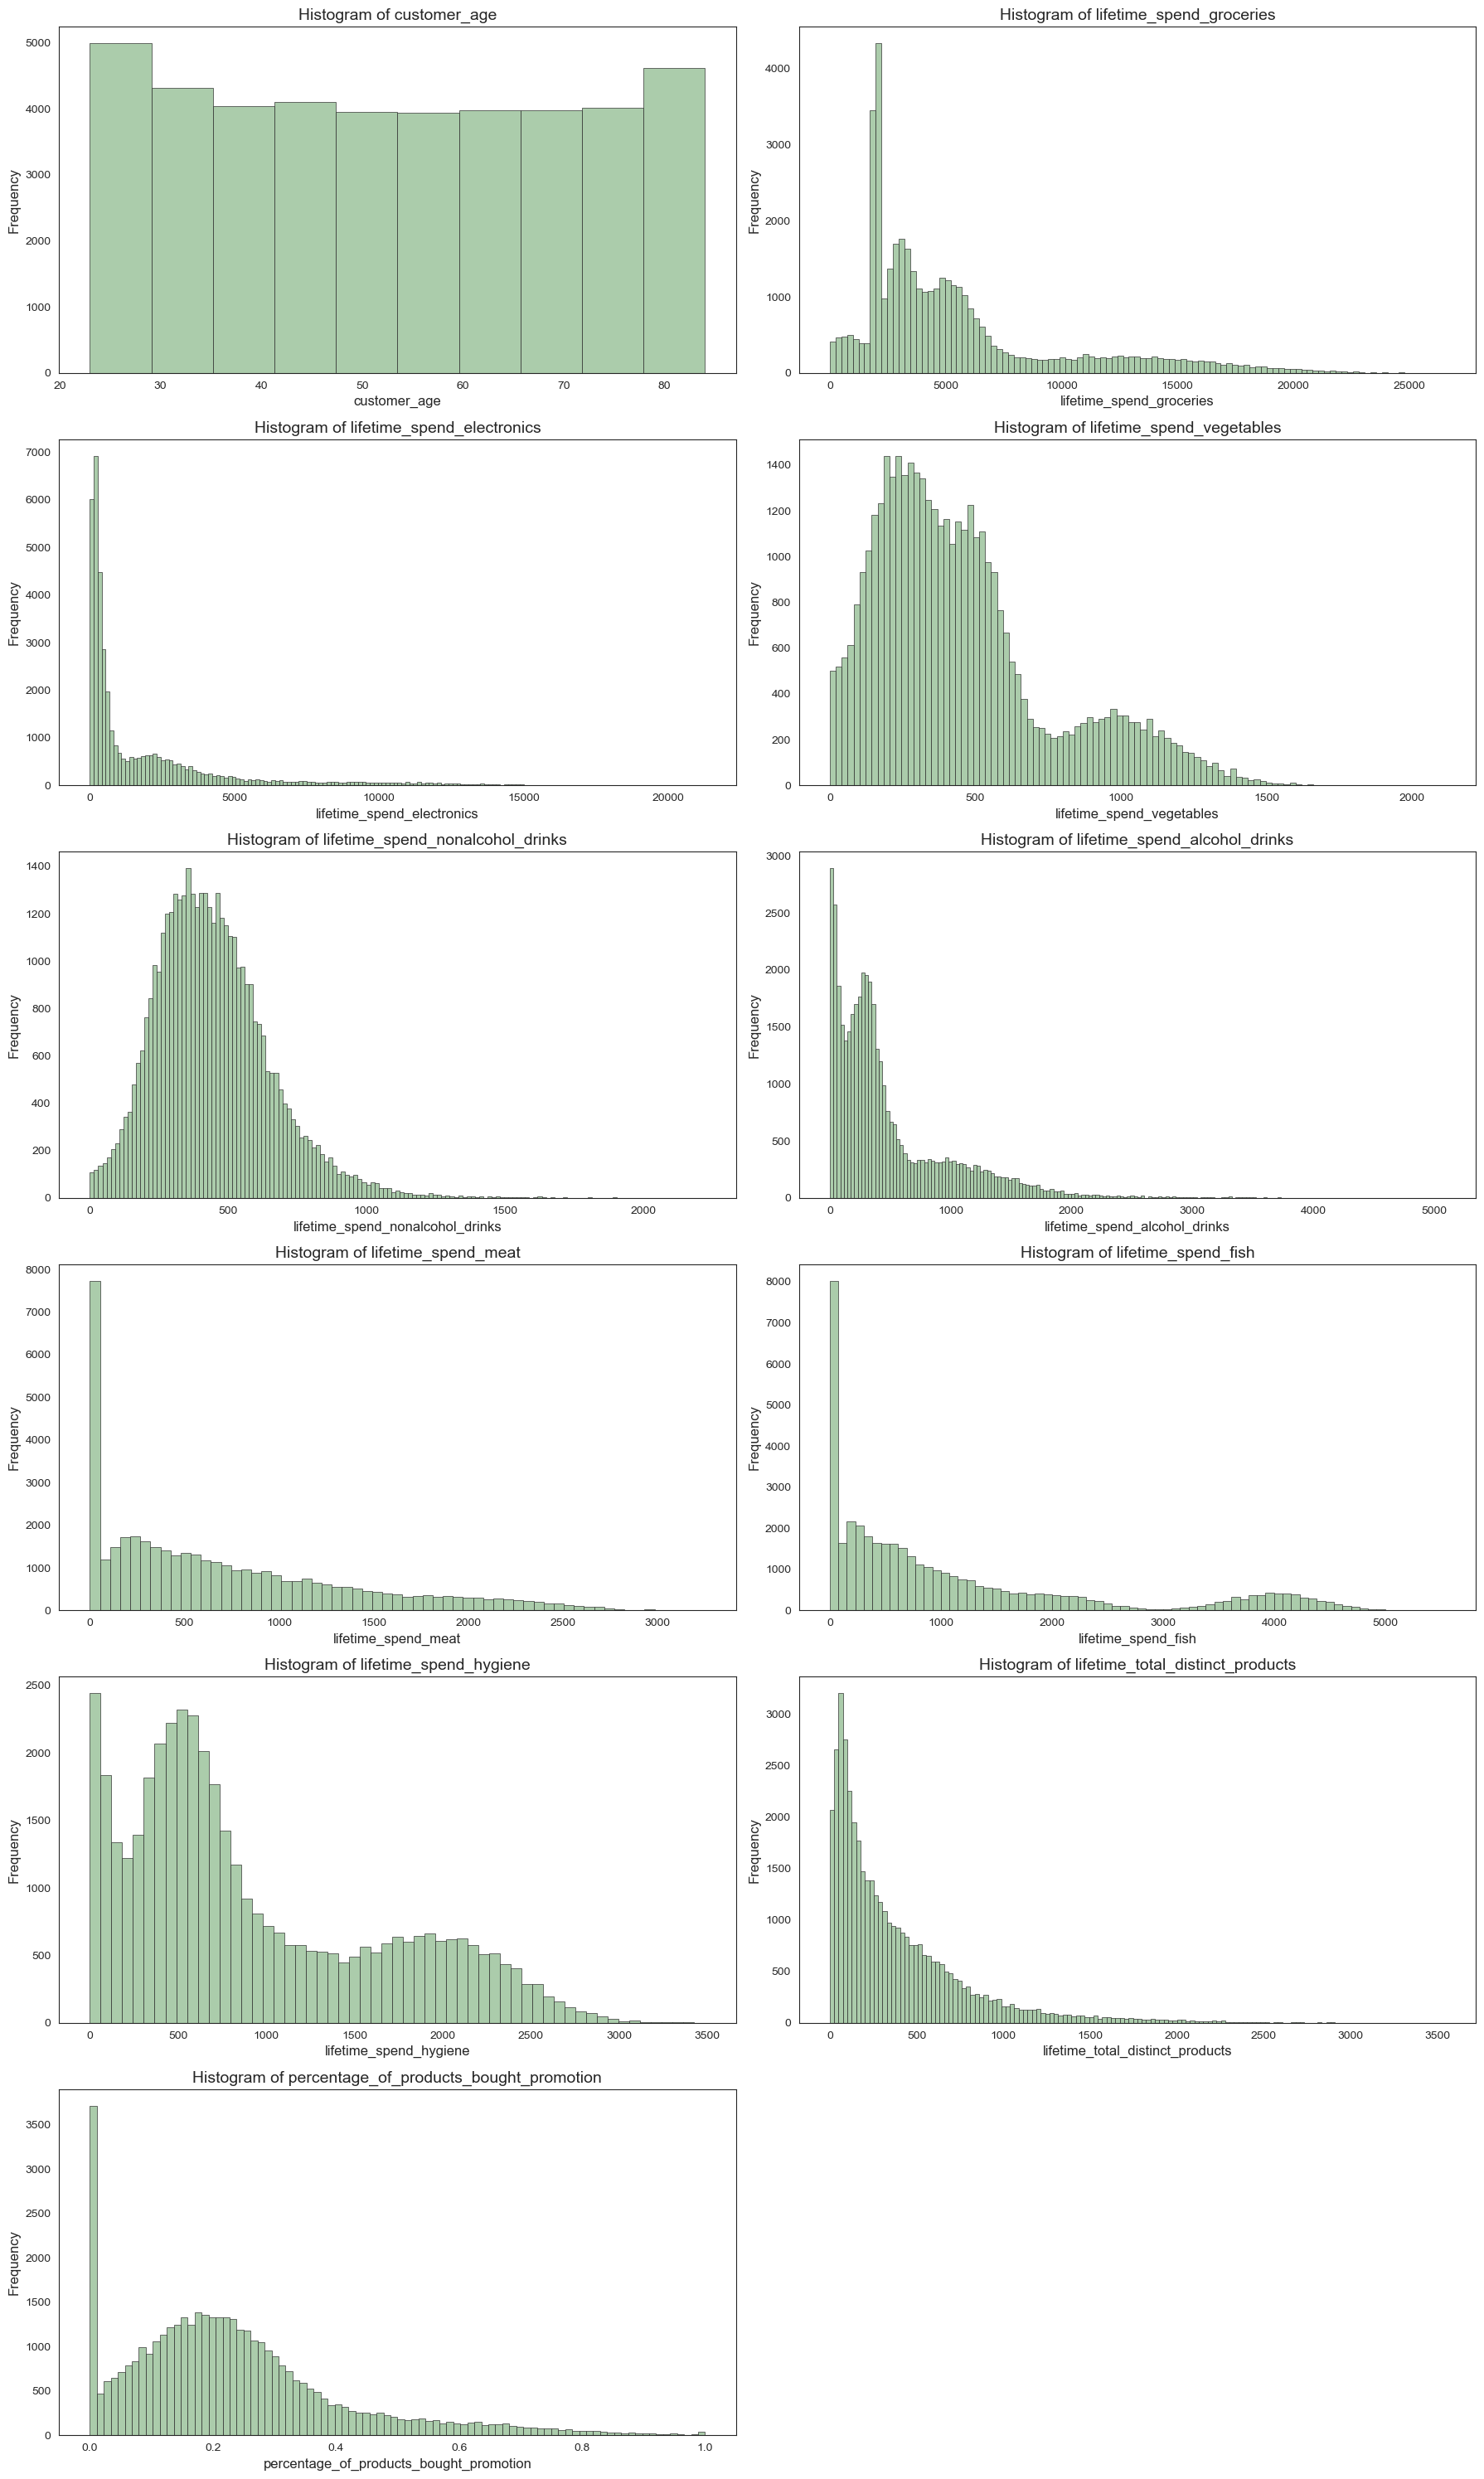

In [27]:
customized_histograms(persons, ['customer_age',
    'lifetime_spend_groceries',
    'lifetime_spend_electronics',
    'lifetime_spend_vegetables',
    'lifetime_spend_nonalcohol_drinks',
    'lifetime_spend_alcohol_drinks',
    'lifetime_spend_meat',
    'lifetime_spend_fish',
    'lifetime_spend_hygiene',
    'lifetime_total_distinct_products',
    'percentage_of_products_bought_promotion'])

##### **Conclusions**: 

Regarding  the **customer_age** variable, we observed an overall uniform ditribution with a peak in the ages of **early 20s and 30s** and of **late 70s to late 80s**    
    
Moving on to the **lifetime_spend variables** we found the following regarding each one:

- **Groceries** - There is a peak at the lower end of the spending spectrum, suggesting many customers spend small amounts on groceries, with a rapid drop-off as the amount increases.

- **Electronics** - Most customers spend very little on electronics, indicated by a high peak at the lower end and a long tail towards the higher spend, which suggests a few customers make significant purchases in this category.

- **Vegetables** - The distribution is somewhat similar to groceries but with less variability in the amounts spent.

- **Nonalcohol_drinks** - The spend on non-alcoholic drinks follows a normal-like distribution, with a majority of customers spending a moderate amount.

- **Alcohol_drinks** - A significant number of customers do not spend much on alcoholic drinks, similar to the distribution of electronics.

- **Meat** - Similar to groceries and vegetables, most customers spend lower amounts on meat, with a few spending significantly more.

- **Fish** - The spending on fish displays a peak at the lower end and tapers off, similar to meat and groceries, indicating a majority spend less in this category.

- **Hygiene** - The distribution is skewed towards lower expenditures with a peak at the low end, similar to several other categories.

- **Total Distinct Products** - There's a steep peak at the lower end, indicating that most customers have bought a smaller range of distinct products, with fewer customers buying a larger variety.
    
 
Lastly, with the visualization for the **percentage_of_products_bought_promotion** variable, we determined that most buyers purchased about **0 to 4%** of items on promotion.
    

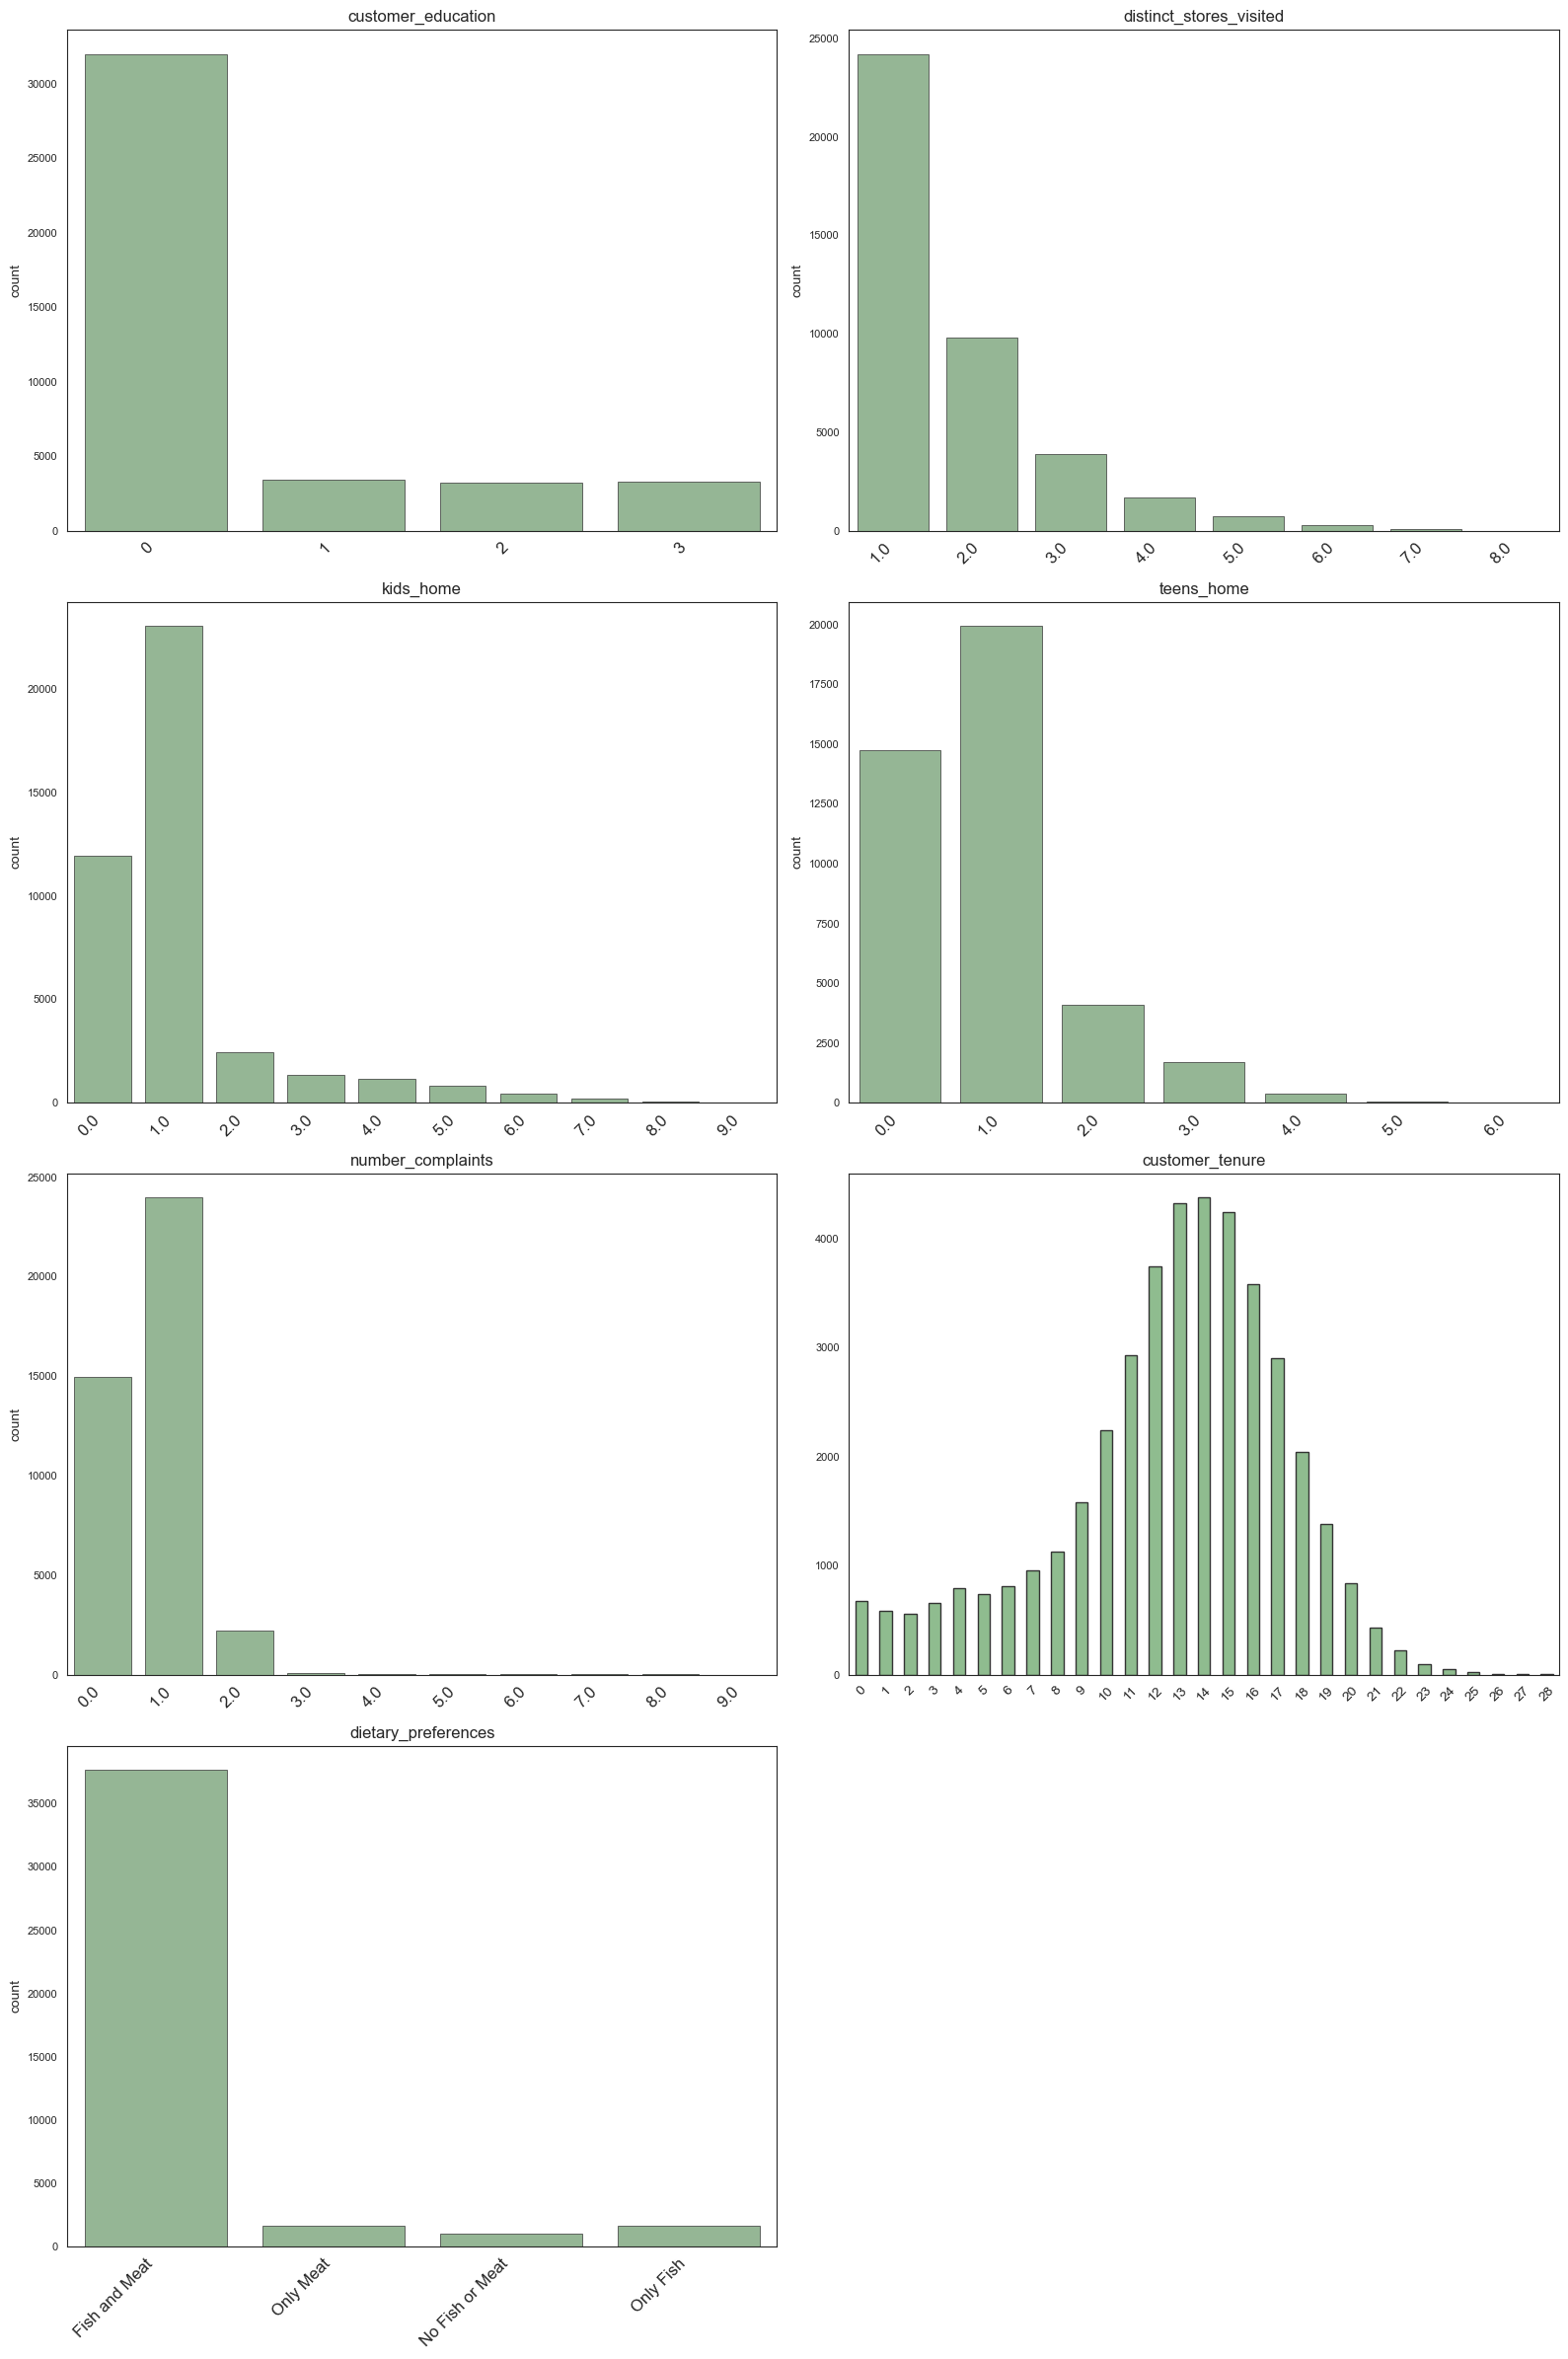

In [28]:
customized_bar_charts(persons,  [
    'customer_education',
    'distinct_stores_visited',
    'kids_home',
    'teens_home',
    'number_complaints', 
'customer_tenure', 
'dietary_preferences'])

In [29]:
pd.set_option('display.max_columns', None)
high_complaints = persons[persons['number_complaints'] > 3]
high_complaints.describe()

customer_age   kids_home  teens_home  number_complaints  \
count    120.000000  120.000000  119.000000         120.000000   
mean      72.583333    1.216667    1.168067           5.083333   
std        7.021675    0.552813    0.397435           1.247406   
min       60.000000    0.000000    0.000000           4.000000   
25%       66.750000    1.000000    1.000000           4.000000   
50%       72.000000    1.000000    1.000000           5.000000   
75%       78.000000    2.000000    1.000000           6.000000   
max       84.000000    2.000000    2.000000           9.000000   

       distinct_stores_visited  lifetime_spend_groceries  \
count               118.000000                120.000000   
mean                  2.008475               3603.908333   
std                   0.919827               1855.711900   
min                   1.000000                 48.000000   
25%                   1.000000               2271.250000   
50%                   2.000000               3550.000000   
75%                   3.000000               4866.250000   
max                   4.000000               8925.000000   

       lifetime_spend_electronics  typical_hour  lifetime_spend_vegetables  \
count                  120.000000    115.000000                 118.000000   
mean                  1248.516667     14.304348                 299.347458   
std                    930.445028      4.448879                  89.586074   
min                     16.000000      6.000000                  42.000000   
25%                    477.000000     10.000000                 241.500000   
50%                   1052.500000     16.000000                 293.000000   
75%                   1811.000000     17.000000                 363.750000   
max                   4512.000000     24.000000                 559.000000   

       lifetime_spend_nonalcohol_drinks  lifetime_spend_alcohol_drinks  \
count                        120.000000                     120.000000   
mean                         290.466667                    1467.891667   
std                           98.515275                     502.173725   
min                           11.000000                     461.000000   
25%                          216.750000                    1108.750000   
50%                          299.500000                    1417.000000   
75%                          352.500000                    1815.250000   
max                          550.000000                    3217.000000   

       lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
count           120.000000           120.000000              120.000000   
mean            541.208333           587.941667             1005.141667   
std             351.546784           410.303337              430.712470   
min              13.000000             8.000000               50.000000   
25%             247.500000           259.750000              686.000000   
50%             496.500000           566.000000              965.000000   
75%             799.250000           874.250000             1281.500000   
max            1424.000000          1838.000000             2475.000000   

       lifetime_spend_videogames  lifetime_spend_petfood  \
count                 120.000000              120.000000   
mean                  543.716667              584.475000   
std                   392.723569              396.618055   
min                    20.000000                0.000000   
25%                   220.250000              268.500000   
50%                   469.500000              534.000000   
75%                   810.250000              805.000000   
max                  1547.000000             1677.000000   

       lifetime_total_distinct_products  \
count                        120.000000   
mean                         529.458333   
std                          343.702038   
min                            2.000000   
25%                          250.750000   
50%                       

##### **Conclusions**: 

By looking at the **customer_education** variable, we observed that most of the customers had no degree associated with them, and that the amount of customers with either a Bachelors, Masters or Phd degrees, were very similar.

In regards to the number of **distinct_stores_visited**, we concluded most customers have only gone to one store, and that they have rarely visited more than 6 different stores.

Moving on to the **kids_home** and **teens_home** variables, we discovered that it is more typical to have one child or teenager at home, with some potential outliers of clients with more than seven children and more than four teenagers.

We discovered that the majority of the clients have submitted one **complaint**, and the remainder have filled none or up to two complaints, with the exception of outliers who have filed more than three.

The data on **customer_tenure** follows an almost normal distribution, with a peak regarding customers of 14 years (since 2010) and very few observations belonging to customers who had their first purchase 28 (1996) and 25 years ago (1999). This might be explained by the possibility of it being the store's early years or a period when data had not yet been collected.

Finally, in terms of **dietary preferences**, we discovered that the majority of clients purchase food for an omnivore diet, followed by a carnivore, a pescetarian, and finally a vegetarian/vegan diet.

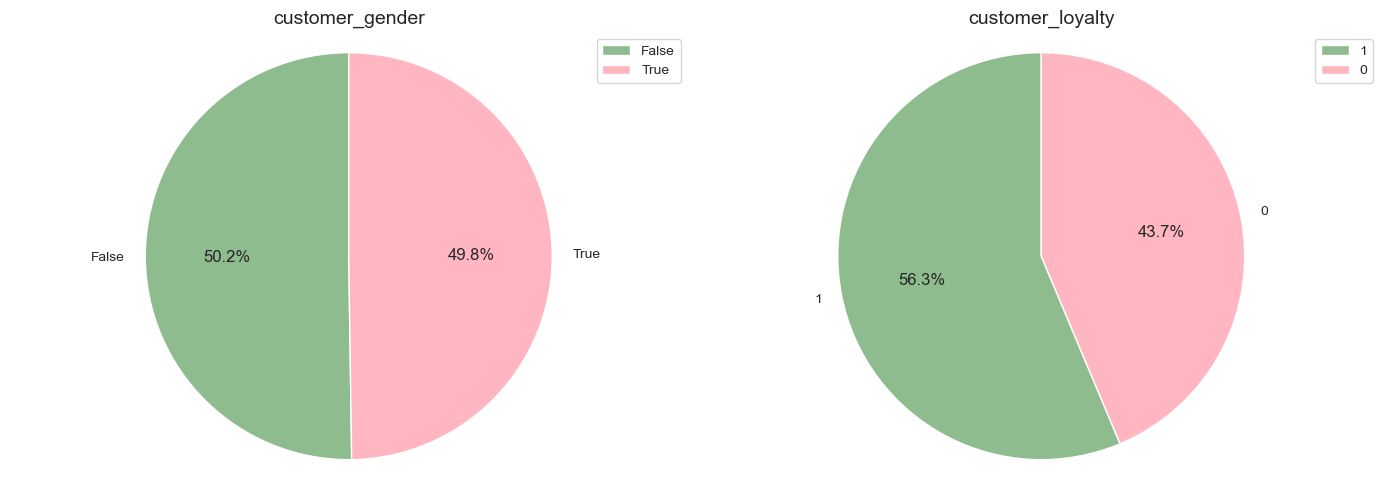

In [30]:
customized_pie_charts(persons, ['customer_gender', 'customer_loyalty'])

##### **Conclusions**: 

Regarding **customer_gender**, the pie chart shows an almost equal distribution between the genders of the customers, with a near 50/50 split. This suggests that gender may not be a significant differentiator in this customer base, and gender-neutral marketing strategies could be effective.

Looking at **customer_loyalty**, more than half of the customers (56.3%) are part of the loyalty program. This is a significant majority and indicates that loyalty programs might be quite effective with this customer base. It suggests that loyalty incentives could be a powerful tool for increasing customer retention and possibly driving sales.

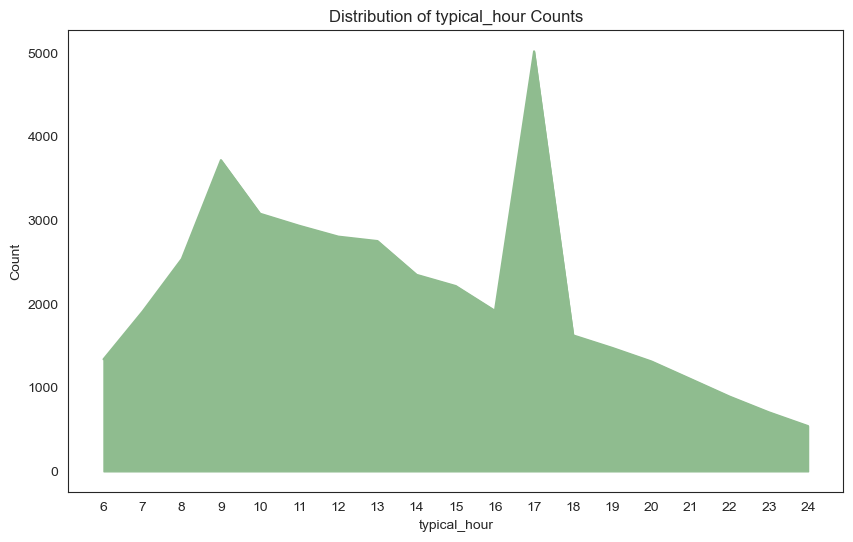

In [31]:
filled_line_plot(persons, 'typical_hour')

##### **Conclusions**: 

The hour more frequent is **5:00 pm**, which might be explained by customers who have just concluded their day at work, followed by a large number of clients in the early morning, particularly around **9:00 am**.

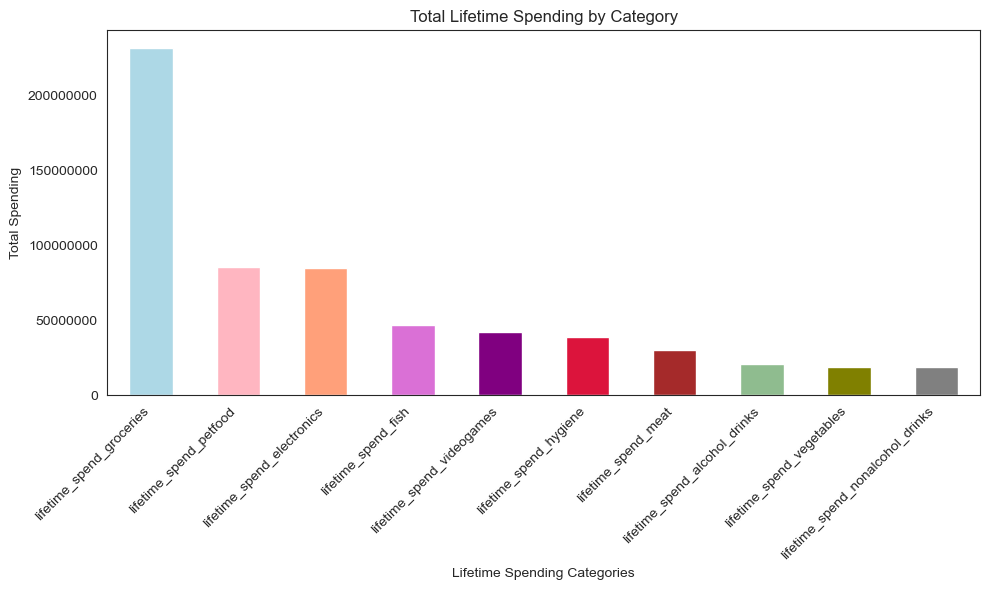

In [32]:
plot_lifetime_spending(persons)

##### **Conclusions**: 

**Groceries** are the most popular purchases among clients, followed by **pet food** and **electronics**.

The least amount of money is spent on the categories such as **alcoholic drinks**, **vegetables**, and lastly **nonalcoholic drinks**.

### 4.2.3. Outliers and Extreme Values

In [33]:
def count_outliers(data: pd.DataFrame, column: str, threshold: float) -> int:
    """
    Count the number of outliers in a column of a DataFrame.

    Parameters:
    - data (pd.DataFrame): The pandas DataFrame containing the data.
    - column (str): The name of the column to check for outliers.
    - threshold (float): The threshold value for defining outliers.

    Returns:
    - int: The number of outliers in the specified column.
    """
    num_outliers = (data[column] > threshold).sum()
    return num_outliers

In [34]:
# List of variable names and corresponding thresholds
variables = [
    ('distinct_stores_visited', 7),
    ('kids_home', 8),
    ('teens_home', 5),
    ('number_complaints', 6),
    ('customer_tenure', 25),
    ('lifetime_spend_groceries', 26000),
    ('lifetime_spend_electronics', 20000),
    ('lifetime_spend_vegetables', 1900),
    ('lifetime_spend_nonalcohol_drinks', 1800),
    ('lifetime_spend_alcohol_drinks', 4300),
    ('lifetime_spend_meat', 3200),
    ('lifetime_spend_fish', 5300),
    ('lifetime_spend_hygiene', 3300),
    ('lifetime_total_distinct_products', 3200),
    ('percentage_of_products_bought_promotion', 0.9)
]

# Create a DataFrame to store the results
outliers_df = pd.DataFrame(columns=['variables', 'Number of Outliers'])

# Populate the DataFrame with the number of outliers for each variable
results = []
for var, threshold in variables:
    num_outliers = count_outliers(persons, var, threshold)
    results.append({'variables': var, 'Number of Outliers': num_outliers})

outliers_df = pd.concat([outliers_df, pd.DataFrame(results)], ignore_index=True)

# Display the result
print(outliers_df)

                                  variables Number of Outliers
0                   distinct_stores_visited                  6
1                                 kids_home                 14
2                                teens_home                  1
3                         number_complaints                 15
4                           customer_tenure                  8
5                  lifetime_spend_groceries                  7
6                lifetime_spend_electronics                  7
7                 lifetime_spend_vegetables                  5
8          lifetime_spend_nonalcohol_drinks                  8
9             lifetime_spend_alcohol_drinks                  9
10                      lifetime_spend_meat                  8
11                      lifetime_spend_fish                  5
12                   lifetime_spend_hygiene                  7
13         lifetime_total_distinct_products                  8
14  percentage_of_products_bought_promotion            

<a id="1"></a>

### 4.2.4 Correlations <font>

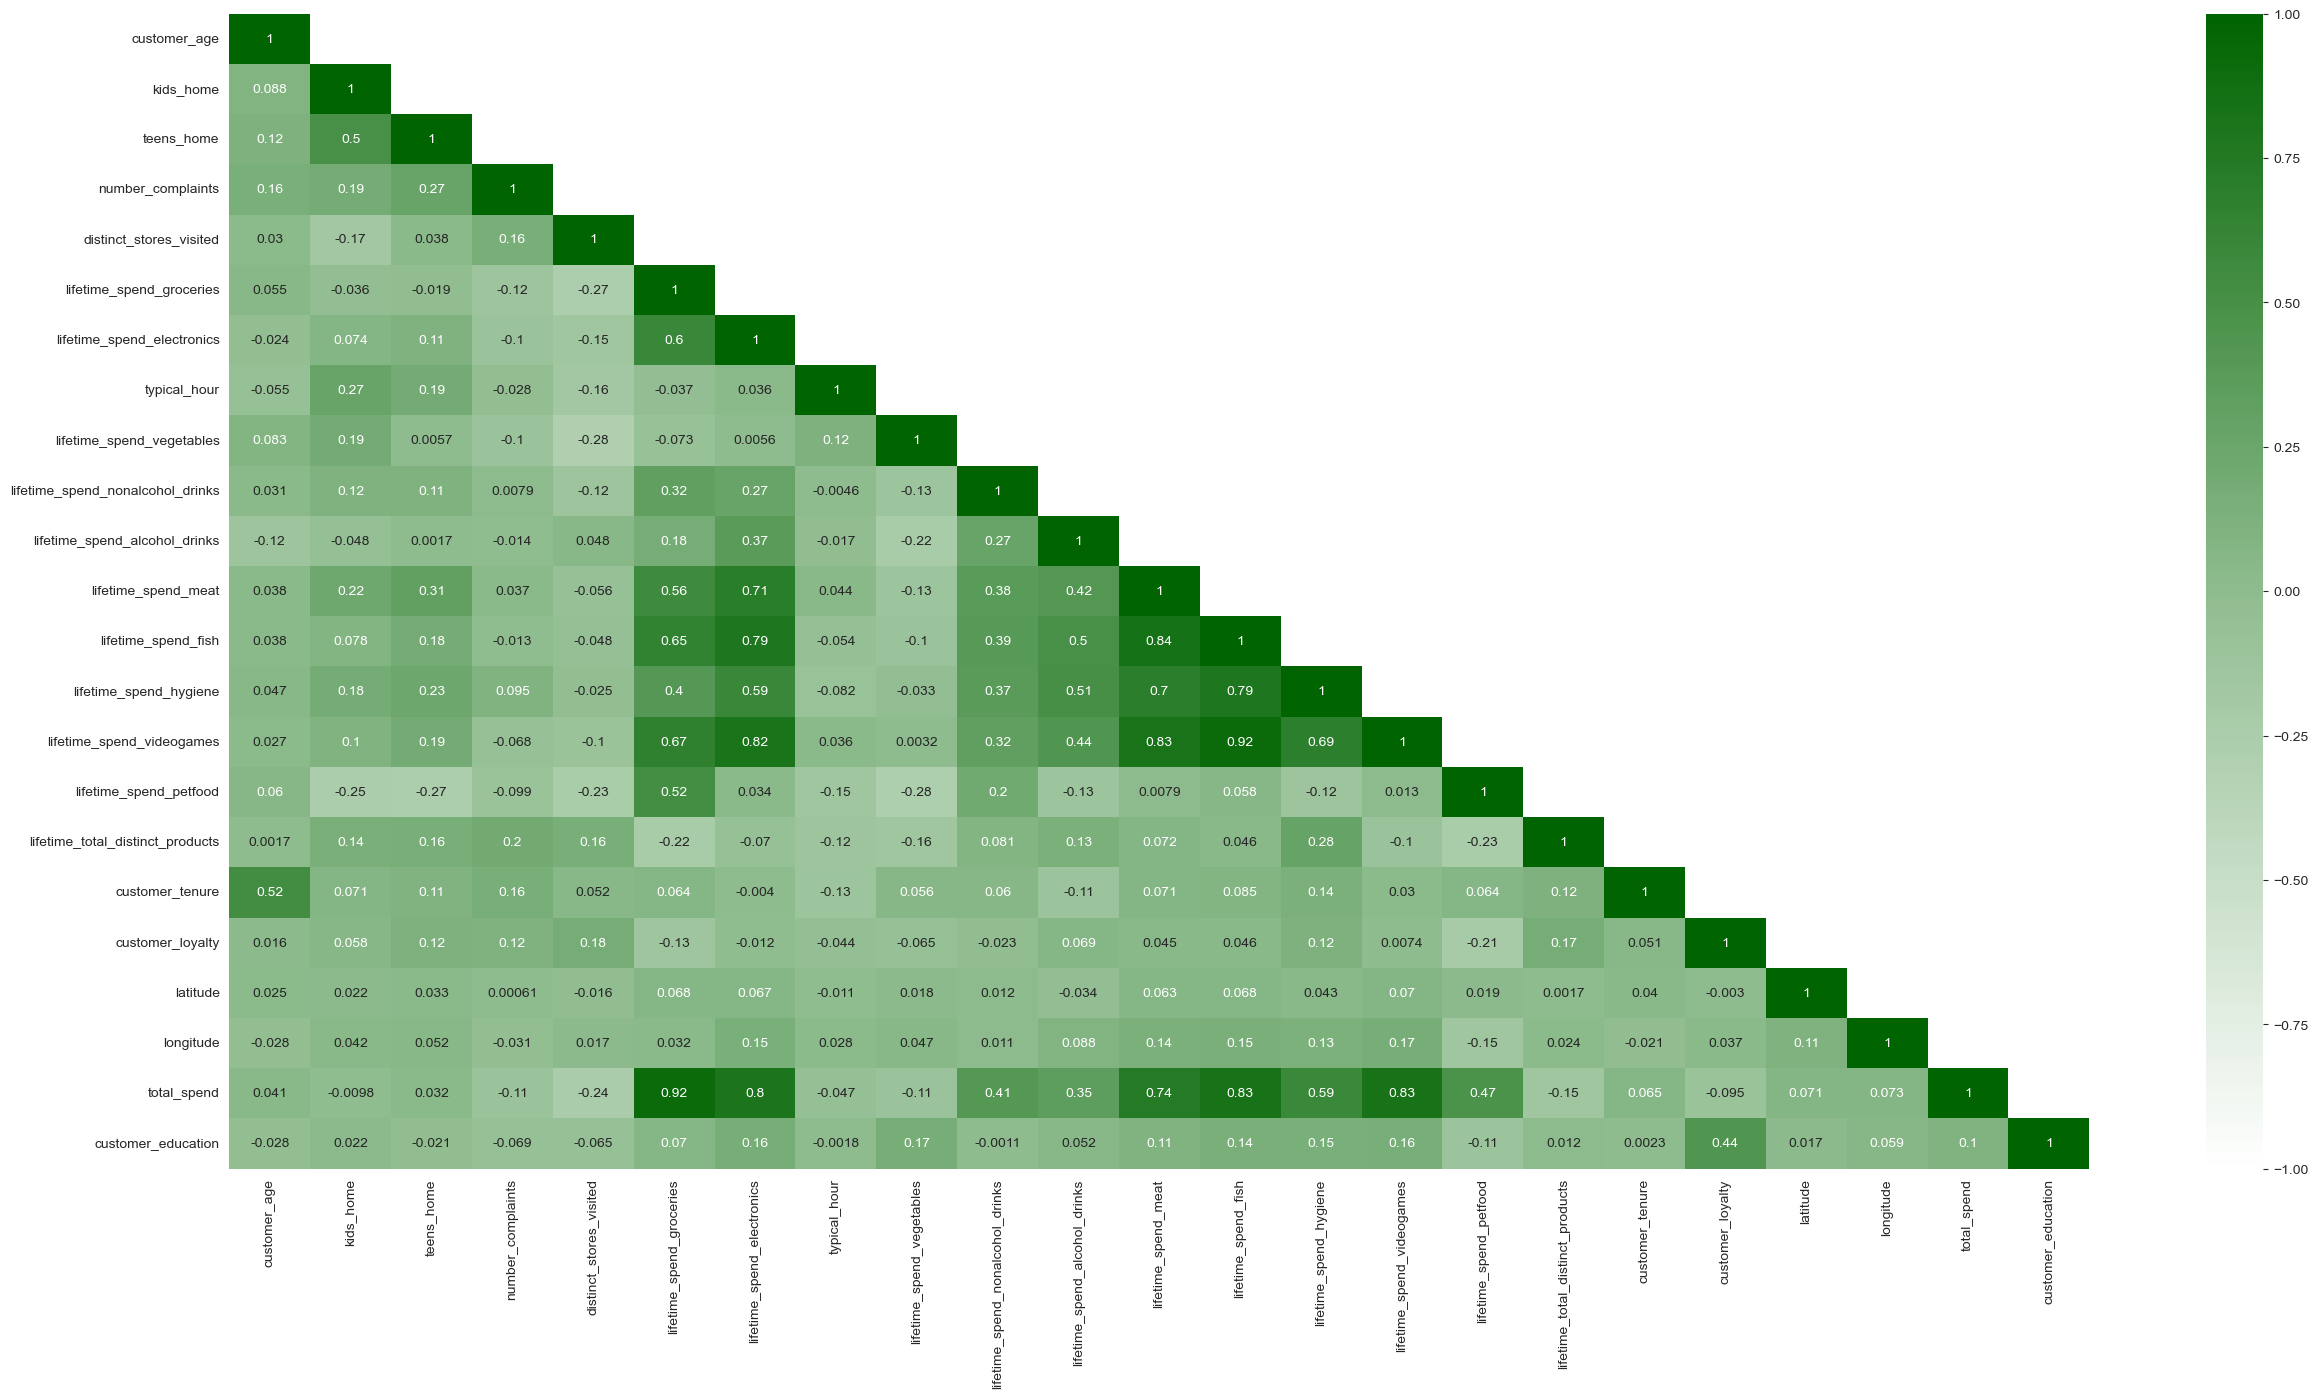

In [35]:
plot_correlation_matrix(persons, 'pearson')

In [36]:
high_correlations(persons, 0.7)

Variable 1                 Variable 2  Correlation
1   lifetime_spend_electronics        lifetime_spend_meat     0.707091
7          lifetime_spend_meat                total_spend     0.735983
8          lifetime_spend_fish     lifetime_spend_hygiene     0.785520
2   lifetime_spend_electronics        lifetime_spend_fish     0.786264
4   lifetime_spend_electronics                total_spend     0.802046
3   lifetime_spend_electronics  lifetime_spend_videogames     0.816631
6          lifetime_spend_meat  lifetime_spend_videogames     0.826449
11   lifetime_spend_videogames                total_spend     0.829821
10         lifetime_spend_fish                total_spend     0.834831
5          lifetime_spend_meat        lifetime_spend_fish     0.842365
9          lifetime_spend_fish  lifetime_spend_videogames     0.917074
0     lifetime_spend_groceries                total_spend     0.919727

####  ***lifetime_spend_fish/groceries/videogames & total_spend***

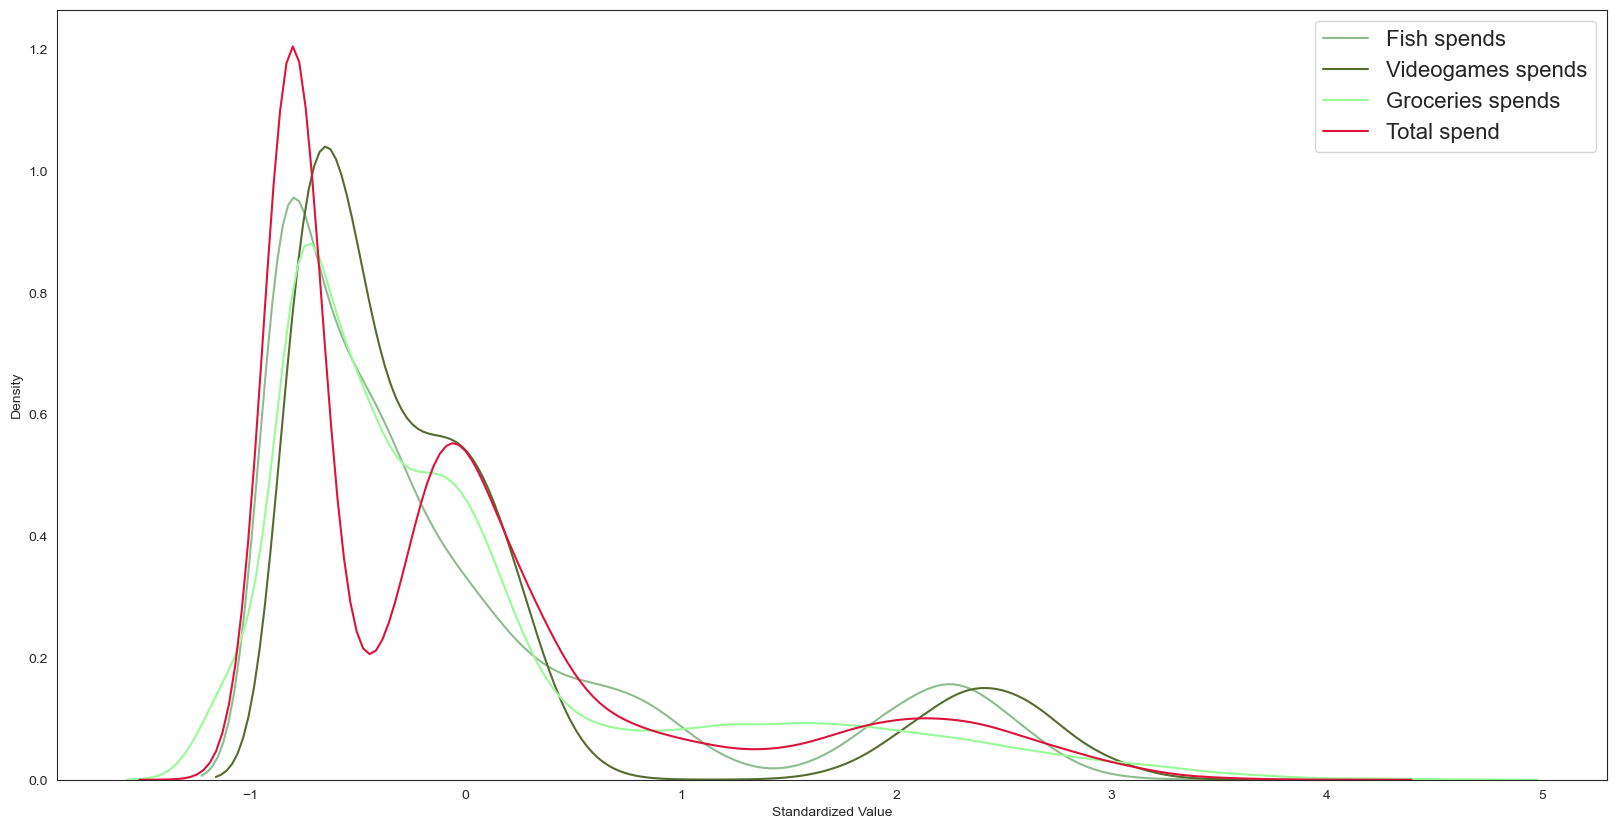

In [37]:
scaled_persons = persons.copy()

# Standardize the numerical columns for visualization
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(scaled_persons[[ 'lifetime_spend_fish', 'lifetime_spend_videogames', 'lifetime_spend_groceries', 'total_spend']])
scaled_persons[[ 'lifetime_spend_fish', 'lifetime_spend_videogames', 'lifetime_spend_groceries', 'total_spend']] = scaled_columns

# Create KDE plots for the scaled numerical columns
sns.kdeplot(scaled_persons.lifetime_spend_fish, color='darkseagreen')
sns.kdeplot(scaled_persons.lifetime_spend_videogames, color='darkolivegreen')
sns.kdeplot(scaled_persons.lifetime_spend_groceries, color='palegreen')
sns.kdeplot(scaled_persons.total_spend, color='crimson')

# Set the legend and label the x-axis
plt.legend(['Fish spends','Videogames spends', 'Groceries spends', 'Total spend'], fontsize=16)
plt.xlabel('Standardized Value')
# Display the plot
plt.show()


##### **Conslusions**:

The correlation between these spending categories and total spend suggests that increases in spending in any of these categories tend to contribute significantly to the total spend, which mean these are the categories were clients tend to spend more. 

#### ***lifetime_spend_meat & lifetime_spend_fish***

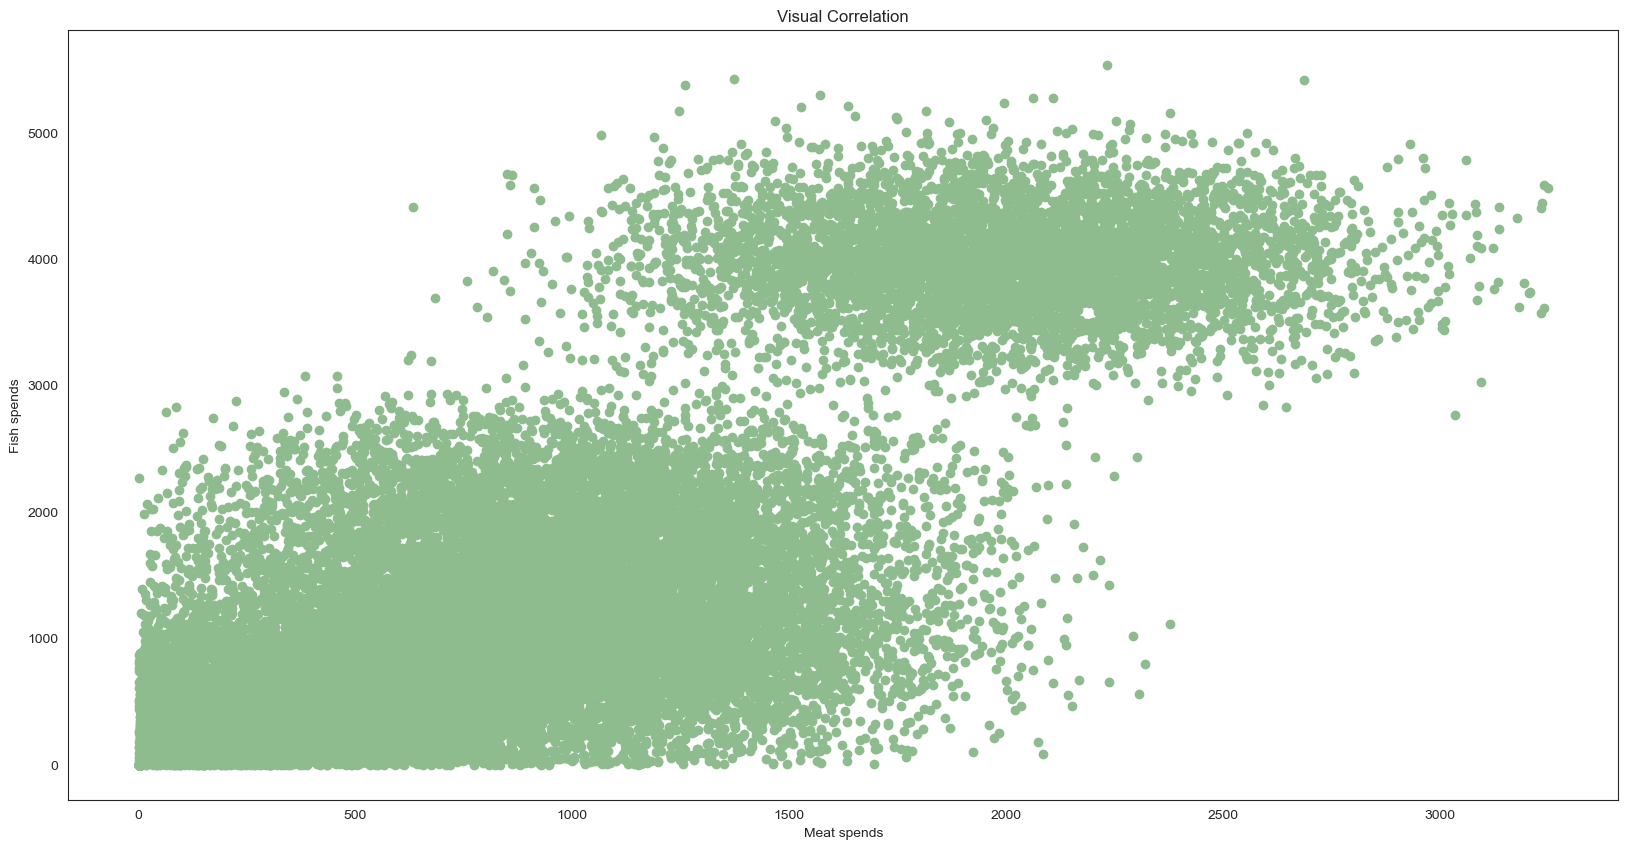

In [38]:
plt.scatter(persons.lifetime_spend_meat, persons.lifetime_spend_fish, color='darkseagreen')
plt.xlabel('Meat spends')
plt.ylabel('Fish spends')
plt.title('Visual Correlation')
plt.show()


##### **Conclusions**:

The plot suggests a positive correlation between Fish and Meat spends. The density of points is higher towards the lower end of both axes, which means that most customers spend a moderate amount on both fish and meat. However, there's a noticeable spread as you move towards higher expenditures, this suggest that a smaller segment of customers has significantly higher spends in these categories.



#### ***lifetime_spend_eletronics & lifetime_spend_fish/meat***

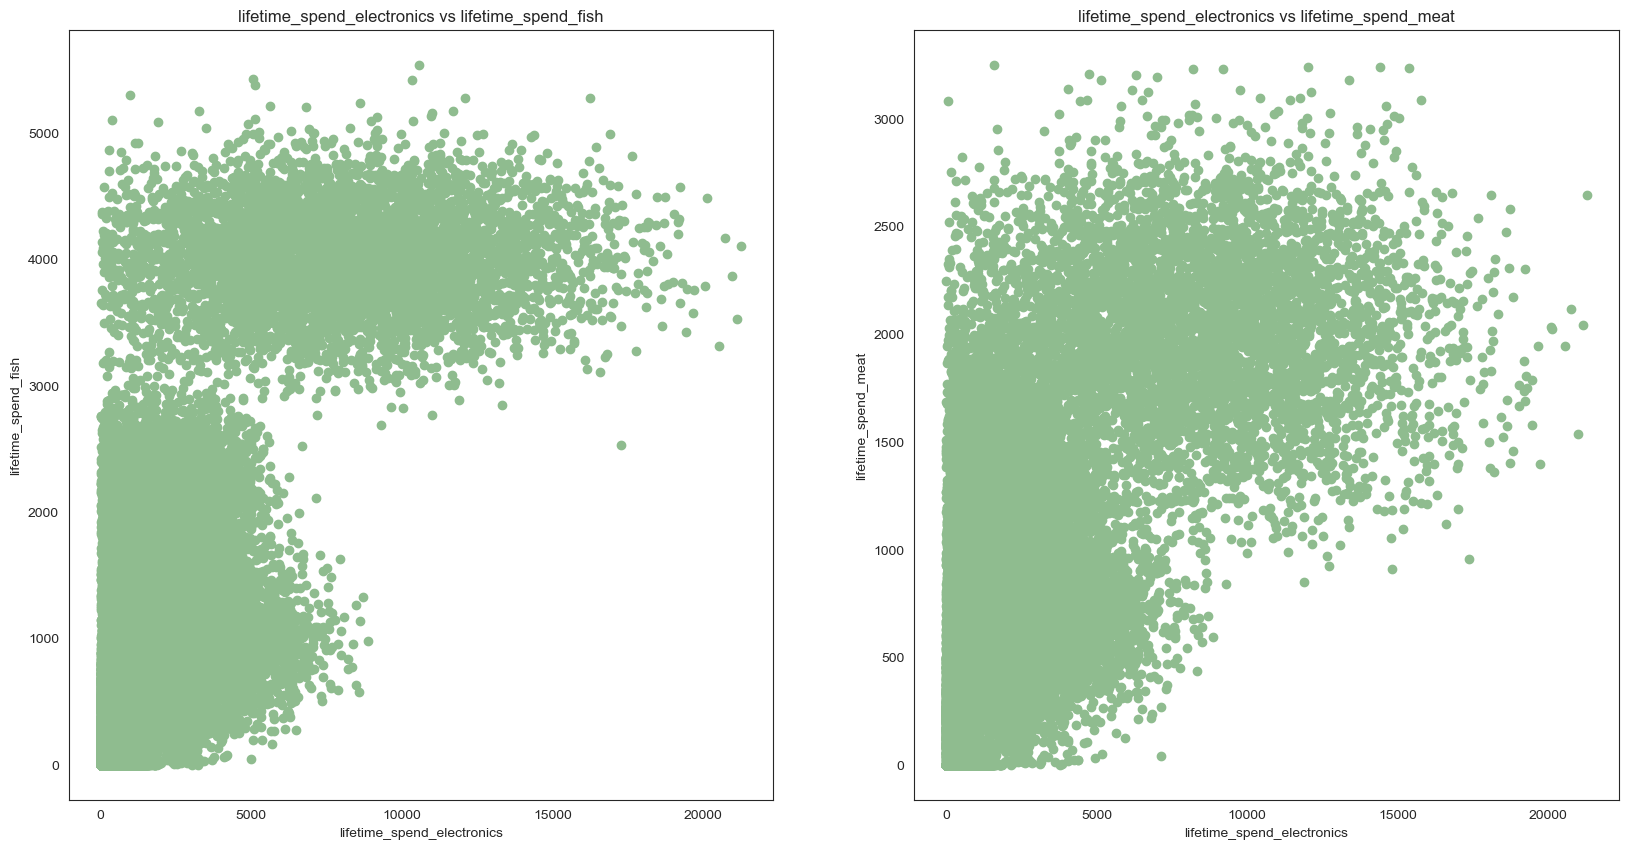

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2)
customized_scatter(ax1, persons, 'lifetime_spend_electronics', 'lifetime_spend_fish')
customized_scatter(ax2, persons, 'lifetime_spend_electronics', 'lifetime_spend_meat')

#### **Conclusions**:

**Eletronics & Fish**: The plot suggests that customers who spend more on electronics also tend to spend more on fish. We can see there is a dense cluster of data points along the lower spend regions for both categories, but the spread along the electronics axis is substantial, implying that while many customers spend lower amounts, there are several high spenders on electronics among them.

**Eletronics & Meat:** The relationship in this plot seems weaker compared to the Electronics & Fish. The data points are more spread out, indicating a broader range of spending behaviors. The vertical spread along the meat spend axis suggests variability in meat spending that doesn't necessarily increase with higher electronics spending.

#### ***lifetime_spend_videogames & lifetime_spend_fish/meat/eletronics***

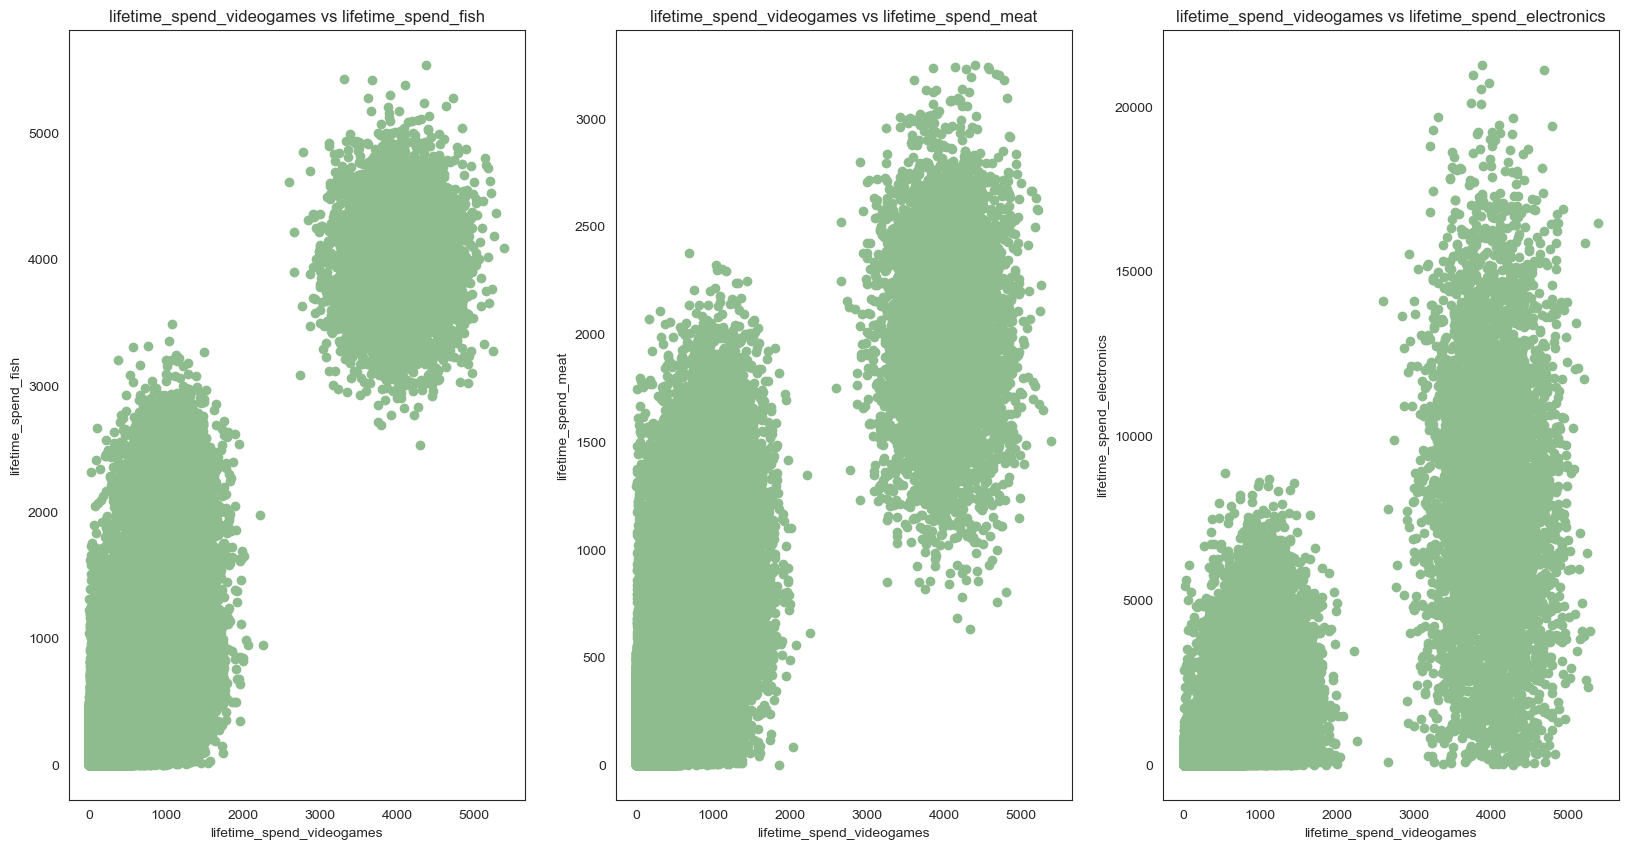

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
customized_scatter(ax1, persons, 'lifetime_spend_videogames', 'lifetime_spend_fish')
customized_scatter(ax2, persons, 'lifetime_spend_videogames', 'lifetime_spend_meat')
customized_scatter(ax3, persons, 'lifetime_spend_videogames', 'lifetime_spend_electronics')

##### **Conclusions**:

**Video Games & Fish**: It seems that as video game spending increases, fish spending also increases. We can also see two distinct groups, one representing cutomers with moderate spendings and the other higher spendings.

**Video Games & Meat**: This plot is more vertical, indicating a weaker correlation compared to the Video Games vs. Fish plot. Higher spenders on video games do not necessarily spend significantly more on meat.

**Video Games & Electronics**: This plot shows a more pronounced upward trend, suggesting a stronger correlation between spending on video games and electronics. This makes intuitive sense as both are related to technology and entertainment.

<a id="1"></a>

### **4.3. Fishy Data <font>**

In [41]:
fishy.head()

customer_name  customer_gender  customer_age  kids_home  \
customer_id                                                            
32                `s Fishy             True            55        0.0   
163               `s Fishy            False            73        0.0   
211               `s Fishy            False            76        0.0   
219               `s Fishy             True            26        0.0   
245          Laura`s Fishy            False            48        0.0   

             teens_home  number_complaints  distinct_stores_visited  \
customer_id                                                           
32                  0.0                NaN                      1.0   
163                 0.0                1.0                      1.0   
211                 0.0                0.0                      1.0   
219                 0.0                1.0                      1.0   
245                 0.0                1.0                      1.0   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
32                            11783.0                        13.0   
163                           15867.0                       245.0   
211                           15206.0                       106.0   
219                           14898.0                       241.0   
245                            9438.0                       119.0   

             typical_hour  lifetime_spend_vegetables  \
customer_id                                            
32                   12.0                     1191.0   
163                   6.0                      733.0   
211                  10.0                      428.0   
219                  17.0                      239.0   
245                   6.0                       23.0   

             lifetime_spend_nonalcohol_drinks  lifetime_spend_alcohol_drinks  \
customer_id                                                                    
32                                      403.0                           56.0   
163                                     520.0                          120.0   
211                                     356.0                          115.0   
219                                     305.0                          115.0   
245                                     358.0                           86.0   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
32                          91.0              37960.0                   152.0   
163                         62.0              36561.0                    82.0   
211                        138.0              35195.0                     4.0   
219                        102.0              38476.0                   138.0   
245                          0.0              44169.0                   190.0   

             lifetime_spend_videogames  lifetime_spend_petfood  \
customer_id                                                      
32                                 0.0                     0.0   
163                                0.0                     0.0   
211                                0.0                     0.0   
219                                0.0                     0.0   
245                                0.0                     0.0   

             lifetime_total_distinct_products  \
customer_id                                     
32                                       26.0   
163                                      19.0   
211                                      21.0   
219                                      31.0   
245                                      41.0   

             percentage_of_products_bought_promotion  customer_tenure  \
customer_id                                                             
32                                          0.14607

### 4.3.1. Data types and Summary Statistics

In [42]:
fishy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 32 to 49919
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   customer_name                                379 non-null    object 
 1   customer_gender                              379 non-null    bool   
 2   customer_age                                 379 non-null    int32  
 3   kids_home                                    374 non-null    float64
 4   teens_home                                   375 non-null    float64
 5   number_complaints                            372 non-null    float64
 6   distinct_stores_visited                      367 non-null    float64
 7   lifetime_spend_groceries                     379 non-null    float64
 8   lifetime_spend_electronics                   379 non-null    float64
 9   typical_hour                                 364 non-null    float64
 10  life

In [43]:
fishy.describe().T

count          mean          std  \
customer_age                                 379.0     54.509235    17.262425   
kids_home                                    374.0      0.024064     0.153454   
teens_home                                   375.0      0.032000     0.176235   
number_complaints                            372.0      0.505376     0.500644   
distinct_stores_visited                      367.0      1.000000     0.000000   
lifetime_spend_groceries                     379.0  13869.997361  1794.890824   
lifetime_spend_electronics                   379.0    186.469657   137.472406   
typical_hour                                 364.0     10.002747     4.170273   
lifetime_spend_vegetables                    373.0    407.109920   280.483351   
lifetime_spend_nonalcohol_drinks             379.0    309.126649    99.513923   
lifetime_spend_alcohol_drinks                379.0    100.055409    49.106510   
lifetime_spend_meat                          379.0     83.517150    46.368168   
lifetime_spend_fish                          379.0  40129.704485  3869.475694   
lifetime_spend_hygiene                       379.0    100.667546    45.755276   
lifetime_spend_videogames                    379.0      0.000000     0.000000   
lifetime_spend_petfood                       379.0      0.000000     0.000000   
lifetime_total_distinct_products             379.0     19.875989     9.123371   
percentage_of_products_bought_promotion      379.0      0.399190     0.203428   
customer_tenure                              379.0     12.770449     4.507204   
customer_loyalty                             379.0      0.796834     0.402887   
latitude                                     379.0     39.164587     0.196922   
longitude                                    379.0     -9.398797     0.017991   
total_spend                                  379.0  55180.203166  4388.384490   
percentage_lifetime_spend_groceries          379.0      0.251707     0.029126   
percentage_lifetime_spend_electronics        379.0      0.003398     0.002526   
percentage_lifetime_spend_vegetables         373.0      0.007424     0.005121   
percentage_lifetime_spend_nonalcohol_drinks  379.0      0.005620     0.001815   
percentage_lifetime_spend_alcohol_drinks     379.0      0.001825     0.000915   
percentage_lifetime_spend_meat               379.0      0.001527     0.000866   
percentage_lifetime_spend_fish               379.0      0.726777     0.029948   
percentage_lifetime_spend_hygiene            379.0      0.001839     0.000858   
percentage_lifetime_spend_videogames         379.0      0.000000     0.000000   
percentage_lifetime_spend_petfood            379.0      0.000000     0.000000   
customer_education                           379.0      0.018470     0.198344   

                                                      min           25%  \
customer_age                                    23.000000     40.000000   
kids_home                                        0.000000      0.000000   
teens_home                                       0.000000      0.000000   
number_complaints                                0.000000      0.000000   
distinct_stores_visited                          1.000000      1.000000   
lifetime_spend_groceries                      7740.000000  12606.000000   
lifetime_spend_electronics                       1.000000     81.500000   
typical_hour                                     6.000000      7.000000   
lifetime_spend_vegetables                        5.000000    208.000000   
lifetime_spend_nonalcohol_drinks                14.000000    246.000000   
lifetime_spend_alcohol_drinks                    1.000000     65.000000   
lifetime_spend_meat                              0.000000     47.500000   
lifetime_spend_fish                          29430.000000  36997.000000   
lifetime_spend_hygiene                           0.000000     68.000000   
lifetime_spend_videogames                        0.000000      0.000000   
lifetime_

### 4.3.2. Visualizations

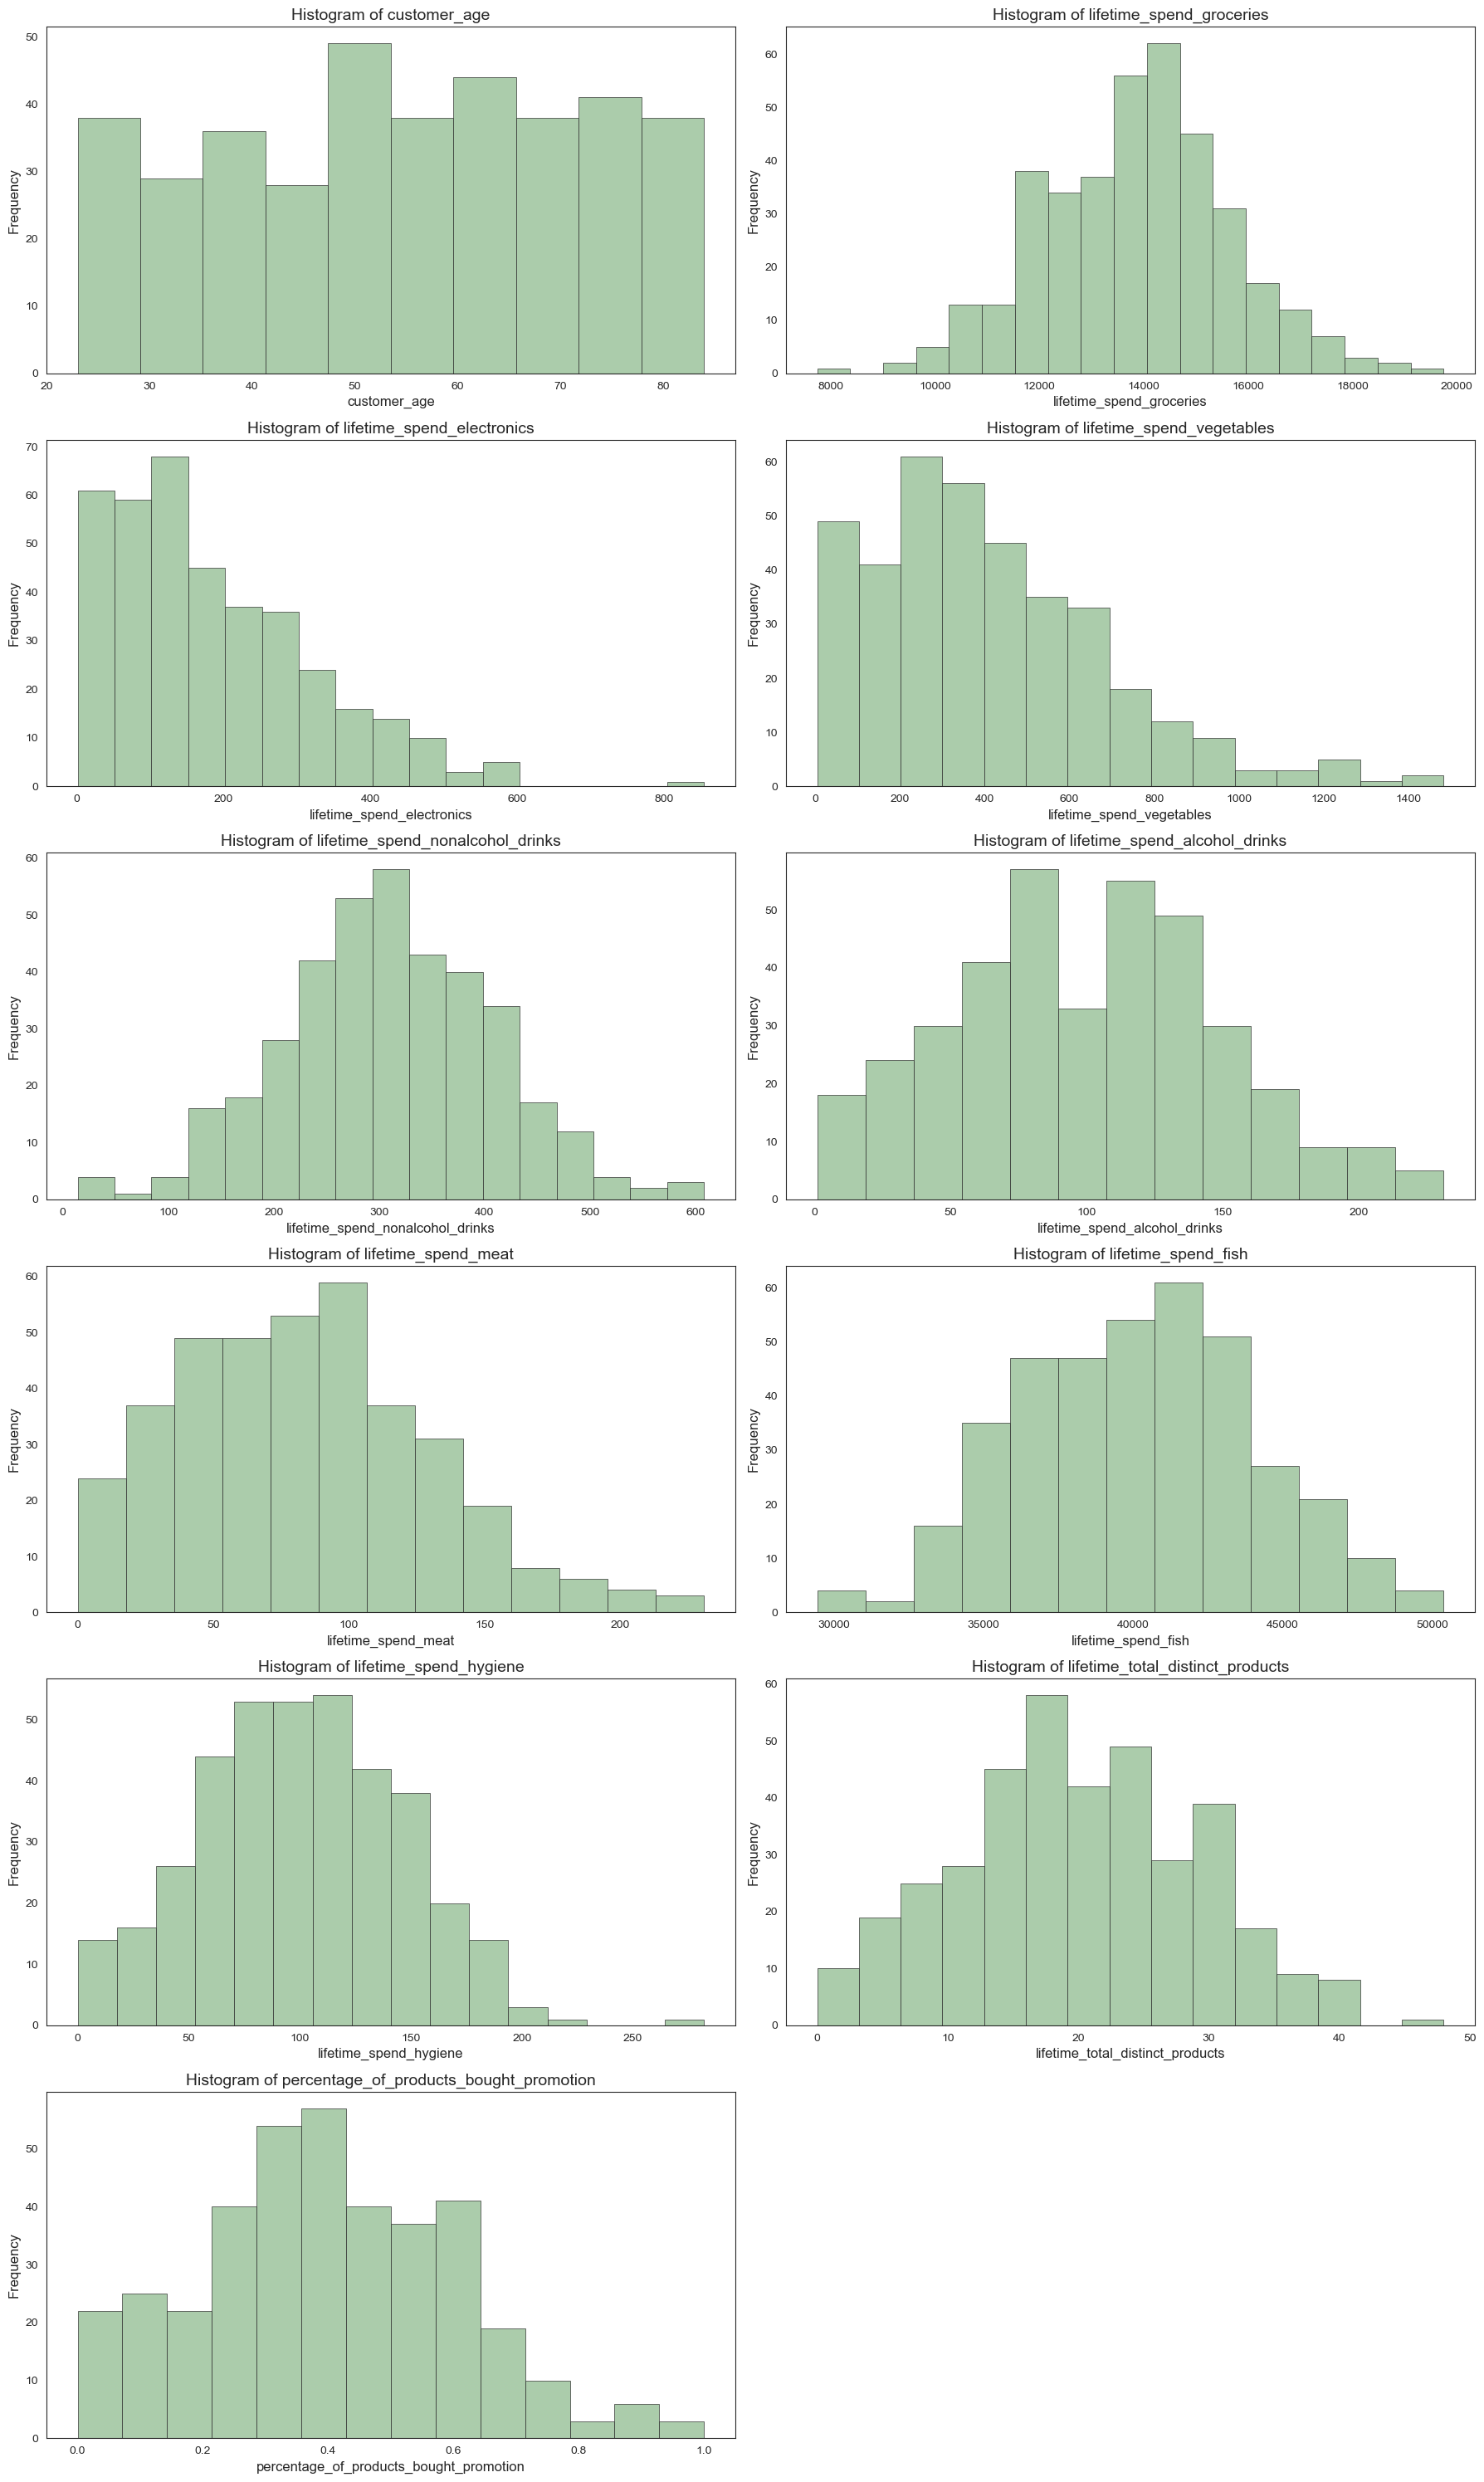

In [44]:
customized_histograms(fishy, ['customer_age',
    'lifetime_spend_groceries',
    'lifetime_spend_electronics',
    'lifetime_spend_vegetables',
    'lifetime_spend_nonalcohol_drinks',
    'lifetime_spend_alcohol_drinks',
    'lifetime_spend_meat',
    'lifetime_spend_fish',
    'lifetime_spend_hygiene',
    'lifetime_total_distinct_products',
    'percentage_of_products_bought_promotion'])

##### **Conclusions**

**Customer Age**: 'Fishy' customers tend to be slightly older on average compared to 'persons' customers, whose age distribution is more uniform and slightly skews younger.

Moving on to the **lifetime_spend variables** we found the following regarding each one:

- **Groceries**: When it comes to groceries, 'Fishy' customers show a mid-range amount spent.

- **Electronics**: For electronics,'Fishy' customers show right-skewed spending patterns, indicating that they spend low amounts on this cateogry

- **Vegetables**: The spending on vegetables is right-skewed like in the 'persons' data.

- **Non-Alcoholic and Alcoholic Drinks**: As for non-alcoholic and alcoholic drinks, 'Fishy' customers mostly spend lower amounts, which aligns with the 'persons' customers.

- **Meat and Fish**: The 'Fishy' dataset has a really high spending on fish and a very low spent in meat when comparing this two categories. 

- **Hygiene**: 'Fishy' customers demonstrate a tendency to spend more on hygiene products compared to 'persons' customers, as indicated by the higher frequency of larger amounts spent within a similarly right-skewed distribution.

- **Total Distinct Products**: In contrast to the 'persons' data, the 'Fishy' data showed a more normally distributed pattern with a less pronounced tail, suggesting that there's less variation in the number of distinct products purchased by the 'fishy' customers.

**Percentage of Products Bought on Promotion**: Compared to the 'persons' data, the 'Fishy' dataset did not exhibit a bi-modal distribution; instead, it had a more uniform distribution across the percentage scale, indicating a more consistent approach to the purchase of promoted products among the 'fishy' customers.


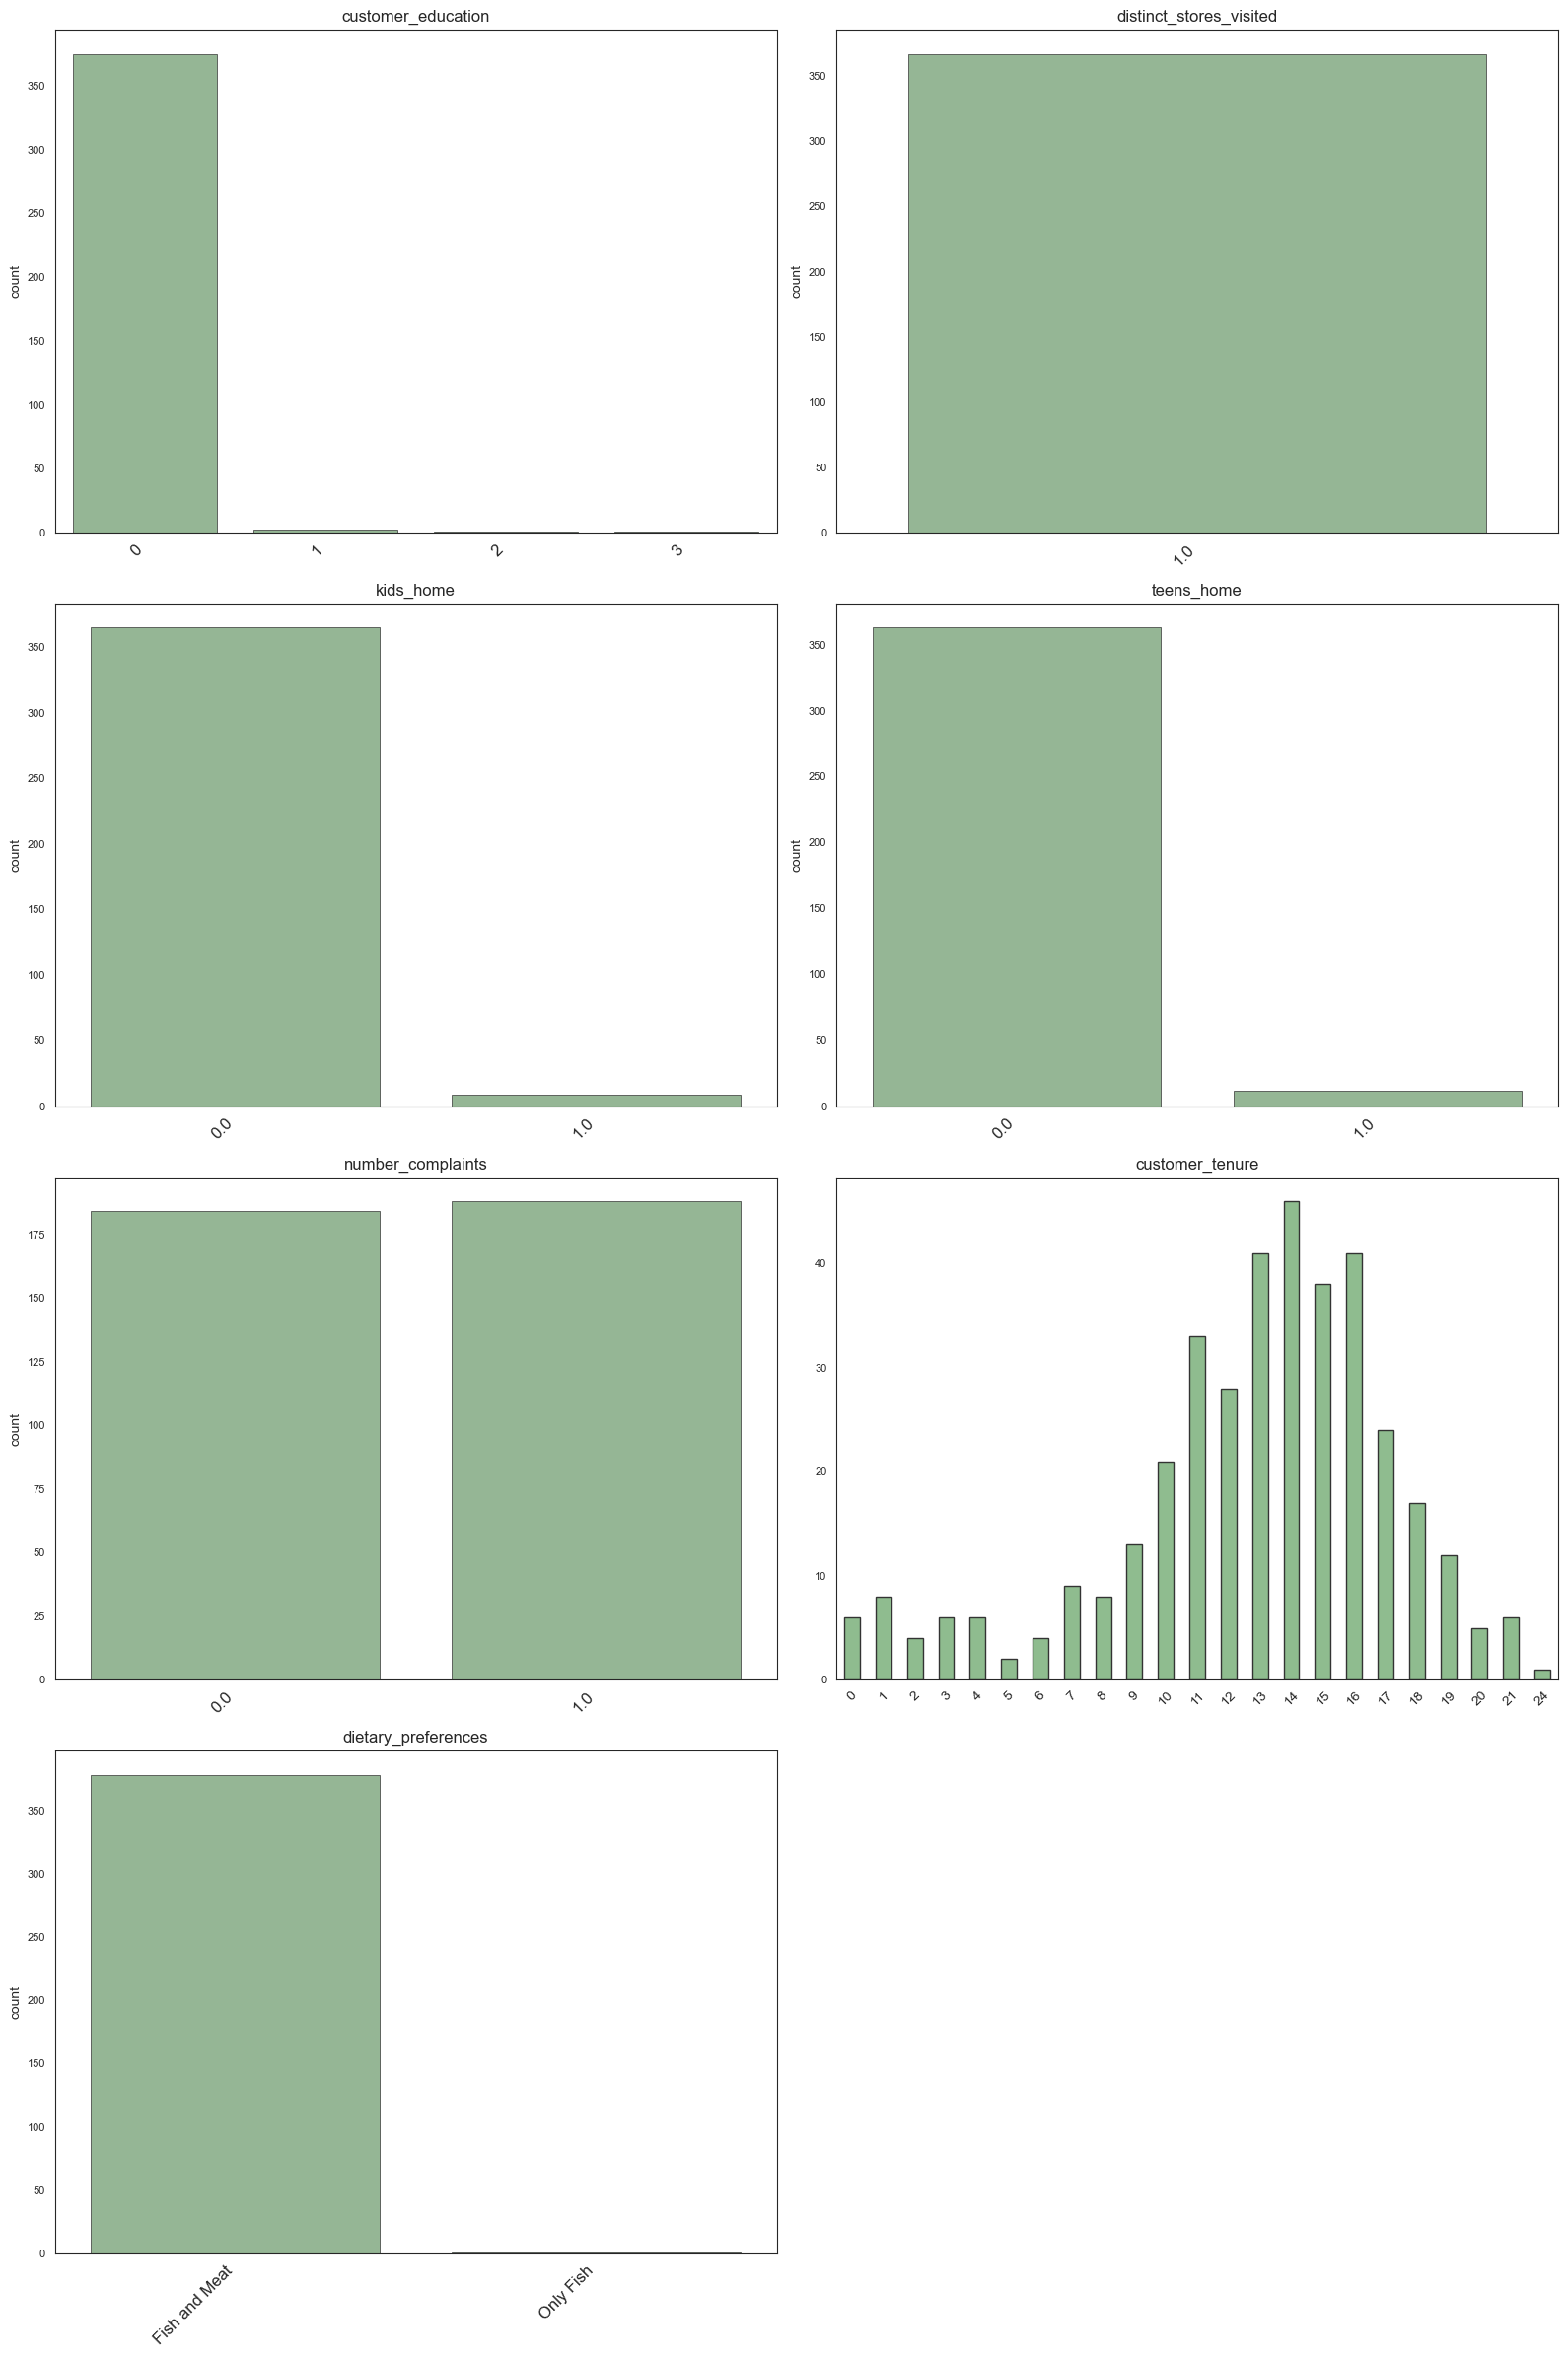

In [45]:
customized_bar_charts(fishy,  [
    'customer_education',
    'distinct_stores_visited',
    'kids_home',
    'teens_home',
    'number_complaints', 
    'customer_tenure',
    'dietary_preferences'])

##### **Conclusions**:

**Customer Education**: Both datasets show a majority of customers with the lowest level of education recorded. However, the 'fishy' dataset shows a really small amount of customers with any type of degree.

**Distinct Stores Visited**: The 'persons' dataset shows a clear preference for one store, with rapidly decreasing counts as the number of stores increases. The 'fishy' dataset, on the other hand, shows an even more pronounced preference for a single store since all 'fishy' customers only buy in one single store.

**Kids and Teens**: Most 'fishy' customers have no kids or teens with a very small percentage having 1 kid/teen.

**Number Complaints**: Both datasets show most customers have not registered complaints, with a very small number having one or more complaints. The 'persons' dataset has a slightly higher frequency of customers with no complaints compared to the 'fishy' dataset.

**Customer Tenure**: As in 'persons' dataset, we can see that 'fishy' that a majority of customers has an antiquity of 14 years.

**Dietary Preferences**: Both the 'persons' and 'fishy' datasets show a strong preference for diets including both fish and meat. This indicates that dietary habits might be similar between the two groups, but since the spendings of fish are way higher their diet probably tend more towards fish.

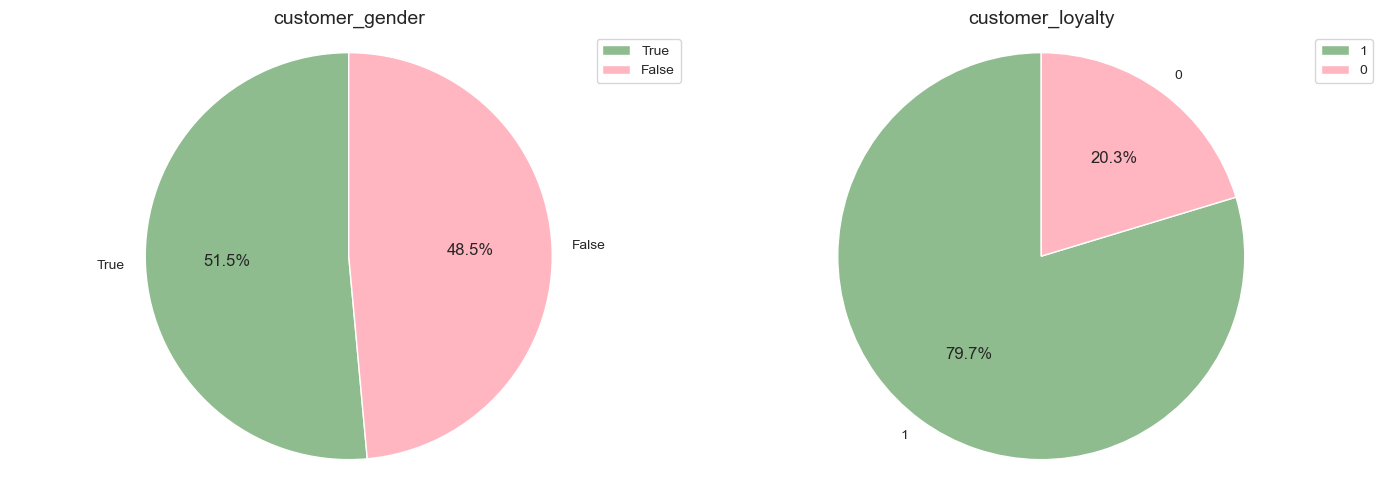

In [46]:
customized_pie_charts(fishy, ['customer_gender', 'customer_loyalty'])

##### **Conclusions**:

The *'Fishy'* dataset in regard to the **customer_loyalty**, shows that nearly 80% of customers have a loyalty card. High loyalty program participation in the 'fishy' data could very well be related to customers predominantly visiting only one specific store. About the **customer_gender**, similar to the *'Persons'* dataset the distribution of male and female is quite balanced.

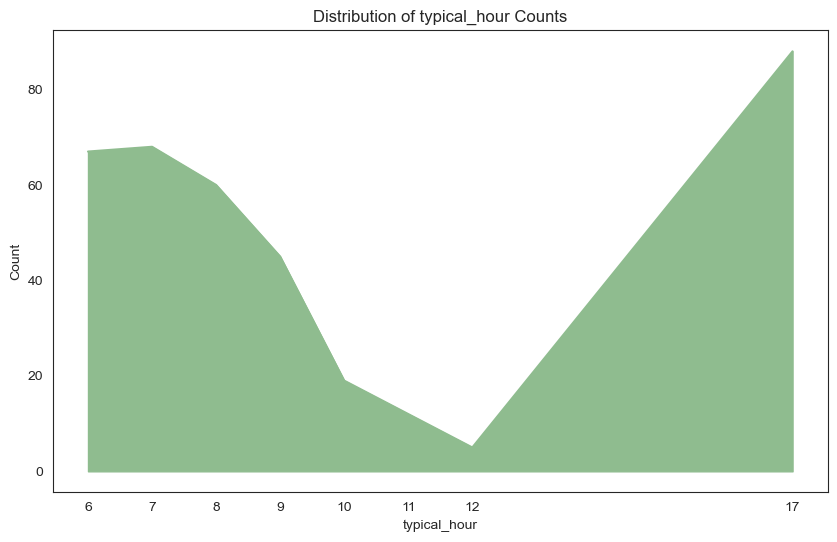

In [47]:
filled_line_plot(fishy, 'typical_hour')

##### **Conclusions**:

The typical hour for this type of customers to visit a store is at **5:00pm**, followed by **7:00am**. Between 12:00pm to 5:00pm we can see a drop in customers , and after 5:00pm no customers at all. This could imply that 'fishy' customers might have a preference or necessity to not shop at those hours, possibly due to work schedules.

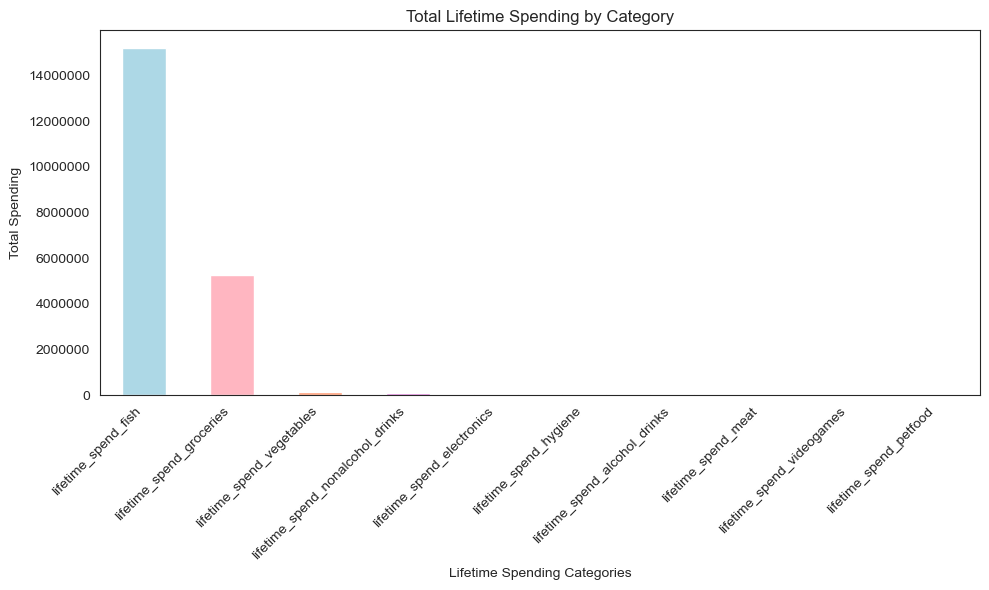

In [48]:
plot_lifetime_spending(fishy)

##### **Conclusions**:

The 'fishy' customers appear to focus their spending fish being by far the leading category, followed by groceries and a very small spending percentage on the other categories. This could reflect the nature of the store, the customer base's preferences and needs, or a combination of both.

### 4.3.2. Correlations

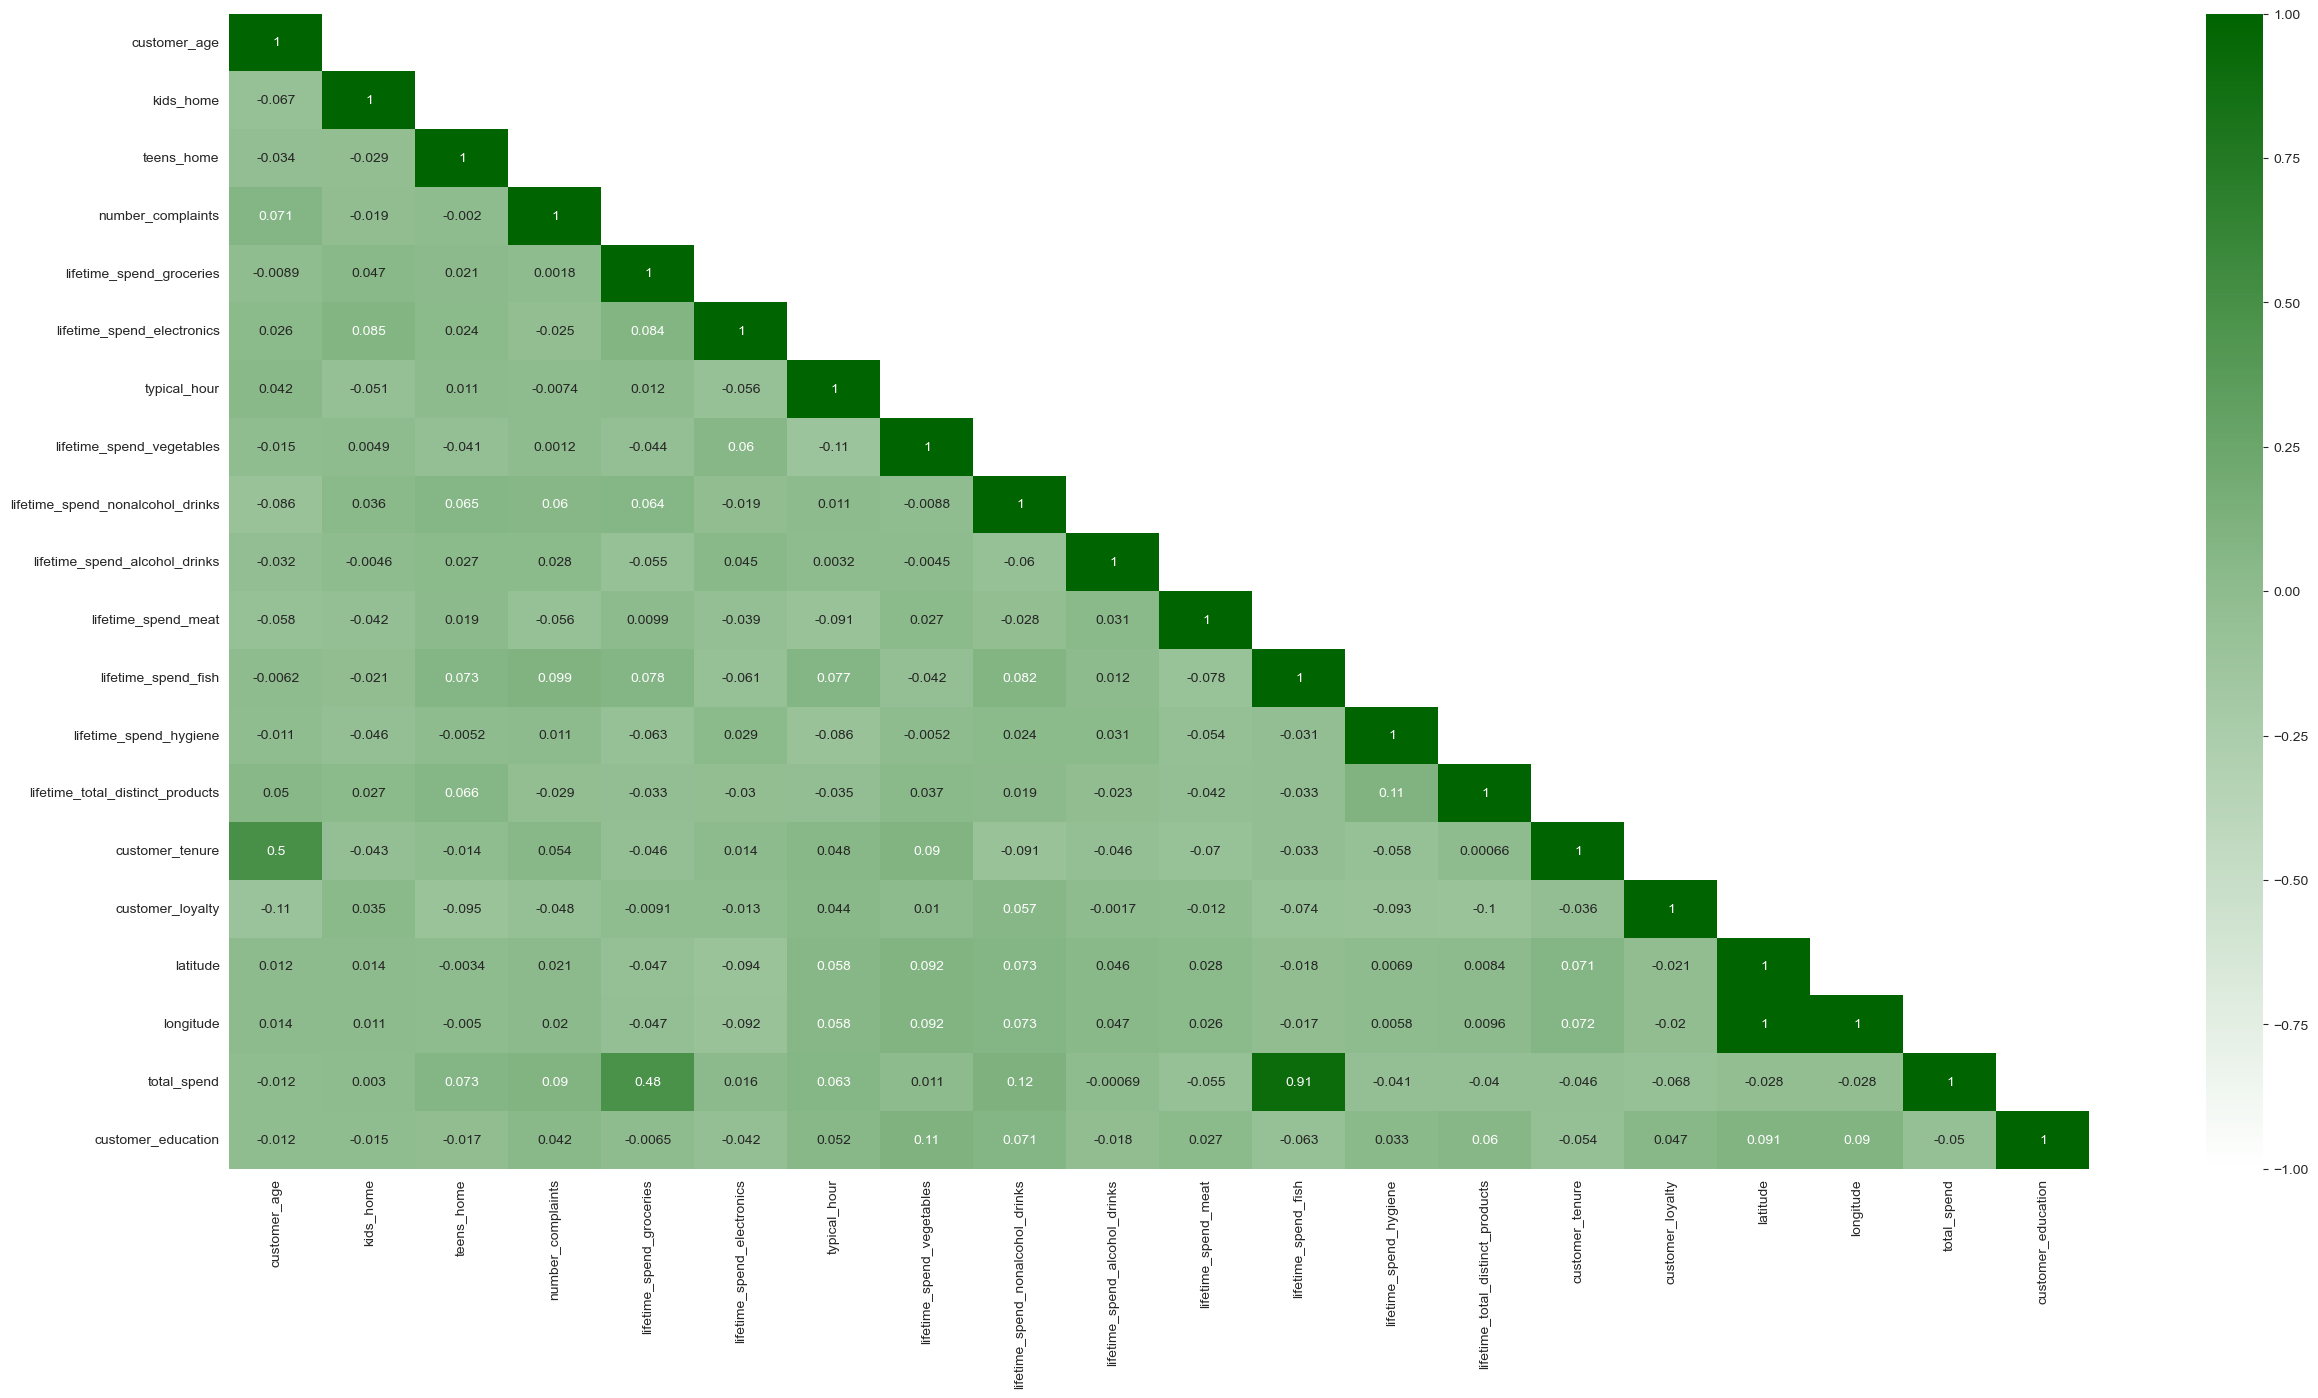

In [49]:
fishy_filtered = fishy.drop(columns=['distinct_stores_visited', 'lifetime_spend_videogames', 'lifetime_spend_petfood'])
plot_correlation_matrix(fishy_filtered, 'pearson')

In the process of preparing data for the correlation analysis of the fishy dataset, it was essential to ensure that only relevant and statistically significant data were included. Upon examining the dataset using the describe() function in pandas, which provides a statistical summary of the DataFrame, it was observed that the columns **distinct_stores_visited, lifetime_spend_videogames, and lifetime_spend_food** all exhibited zero variation. Specifically, the standard deviation for these columns was zero, indicating that all values in these columns were the same.

In [50]:
high_correlations(fishy, 0.7)

Variable 1   Variable 2  Correlation
0  lifetime_spend_fish  total_spend     0.909518
1             latitude    longitude     0.999533

#### ***lifetime_spend_fish & total_spend***

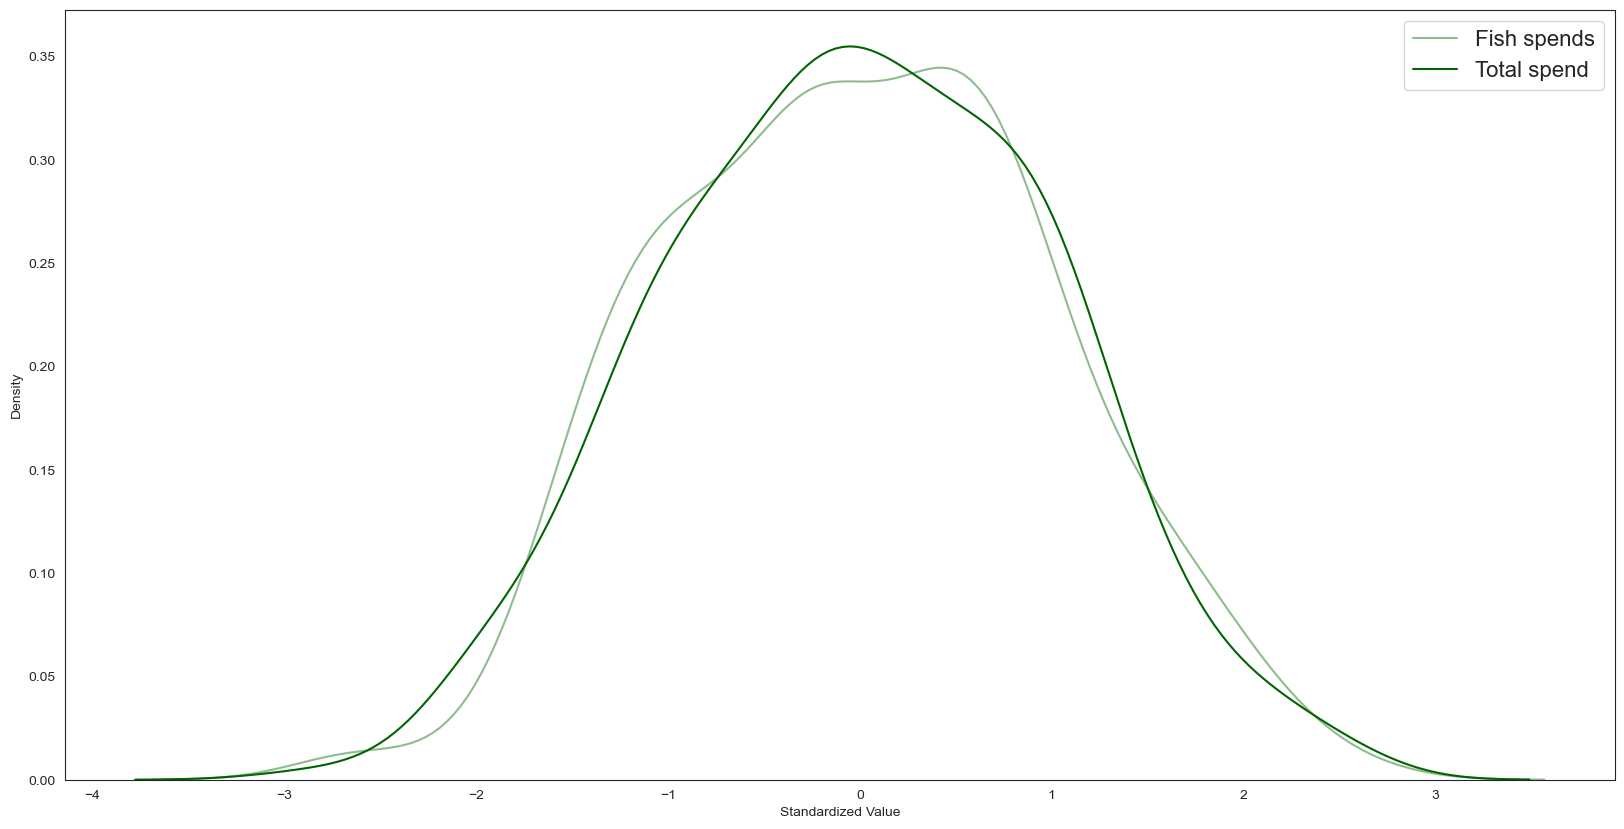

In [51]:
scaled_fishy = fishy.copy()

# Standardize the numerical columns for visualization
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(scaled_fishy[[ 'lifetime_spend_fish','total_spend']])
scaled_fishy[[ 'lifetime_spend_fish','total_spend']] = scaled_columns

# Create KDE plots for the scaled numerical columns
sns.kdeplot(scaled_fishy.lifetime_spend_fish, color='darkseagreen')
sns.kdeplot(scaled_fishy.total_spend, color='darkgreen')


# Set the legend and label the x-axis
plt.legend(['Fish spends', 'Total spend'], fontsize=16)
plt.xlabel('Standardized Value')
# Display the plot
plt.show()

##### **Conclusions**:

This two vaiables show an almost identical distribution, indicating that the spendings in fish influence the most the total_spending. We determine that these clients are most likely fishermen or just pescetarianss, and a result, they are treated as their own cluster from the start, with no need to further analyze their specific characteristics. They will only be addressed again in the association rules.

# **5. Last Feature Transformations**

#### **nr_childs**

In [52]:
#Creating the feature nr_childs in persons dataset, leving behind the teens_home and kids_home variable
persons['nr_childs'] = persons['teens_home'] + persons['kids_home']
persons = persons.drop(columns=['teens_home', 'kids_home'])

#Creating the feature nr_childs in fishy dataset, leving behind the teens_home and kids_home variable
fishy['nr_childs'] = fishy['teens_home'] + fishy['kids_home']
fishy = fishy.drop(columns=['teens_home', 'kids_home'])

# **7. Missing Values Imputation**

In [53]:
columns_to_impute = ['nr_childs', 'number_complaints', 'distinct_stores_visited', 'typical_hour', 'lifetime_spend_vegetables', 'percentage_lifetime_spend_vegetables']

In [54]:
# Initialize KNNImputer with parameters: 4 nearest neighbors and distance weighting
knn_imputer = KNNImputer(n_neighbors=4, weights='distance')

# Perform imputation only on the selected columns
persons_imputed = persons.copy()
persons_imputed[columns_to_impute] = knn_imputer.fit_transform(persons[columns_to_impute])


# **6. Multi-Dimensional Outliers Detection**

In [55]:
persons_imputed.drop(columns=['customer_name', 'customer_gender', 'customer_loyalty', 'total_spend', 'customer_education', 'dietary_preferences'], axis=1, inplace=True)

Initially, we decided to drop the columns **'customer_name', 'customer_gender', 'customer_loyalty', 'total_spend', 'customer_education', and 'dietary_preferences'** only in the segmentation part of our analysis. However, as we are now addressing multidimensional outliers, we have decided to handle these columns in the EDA (Exploratory Data Analysis) notebook for better comprehension and a more thorough analysis.

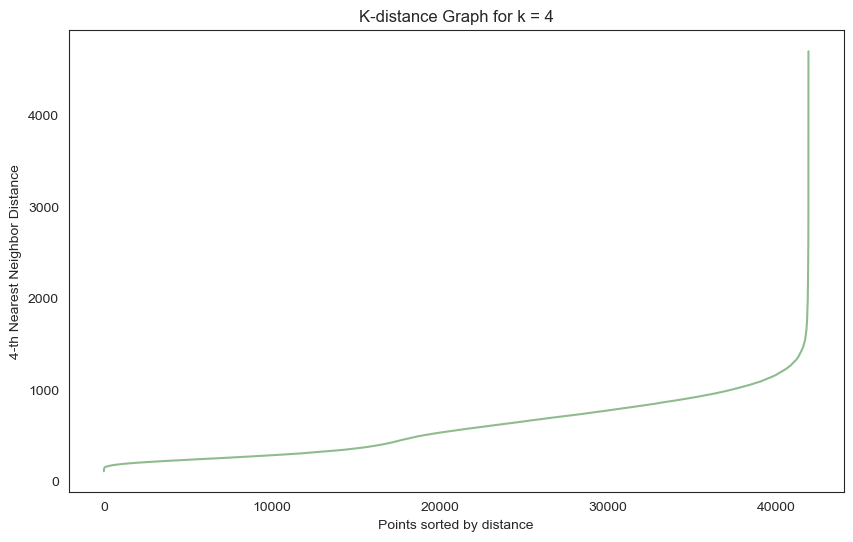

In [56]:
plot_k_distance(persons_imputed, 4)

**k = 4** is a commonly used and recommended value for analyzing the local neighborhood structure in data, offering a good balance between sensitivity to local variations and robustness to noise.

In [57]:
# Use the elbow method to determine a good eps value from the k-distance plot
optimal_eps = 1500

# 2 * number_of_features
min_samples = 2 * persons_imputed.shape[1]


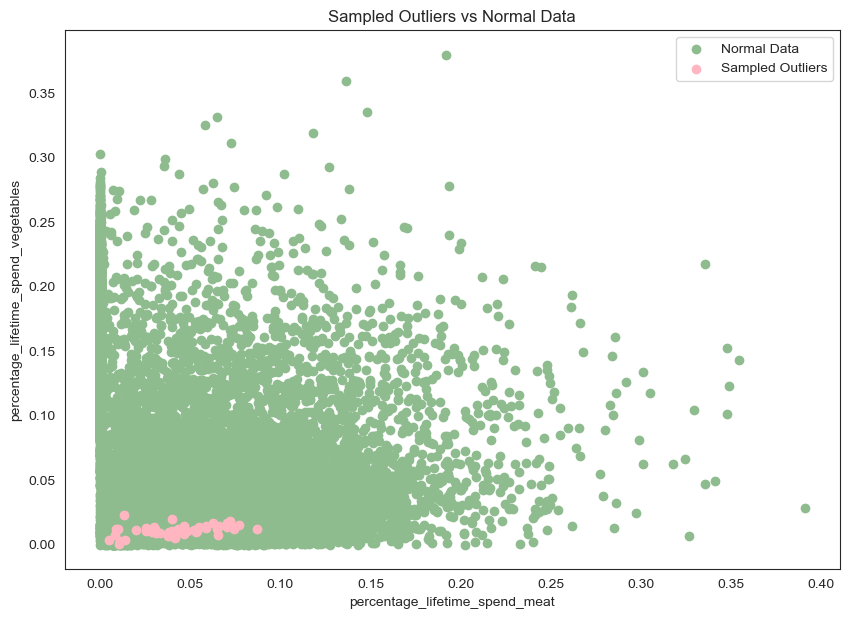

In [58]:
persons_with_outliers = detect_outliers_dbscan(persons_imputed, optimal_eps, min_samples)

# Extract outliers
outliers = persons_with_outliers[persons_with_outliers['outlier']]

# Randomly sample 5 outliers for inspection
sample_outliers = outliers.sample(n=50, random_state=42)
visualize_outliers_vs_normal(persons_with_outliers, sample_outliers, 'percentage_lifetime_spend_meat', 'percentage_lifetime_spend_vegetables')

##### **Potential Anomaly:**   

- **Low Number of Vegetables and Meat bought:** The customers with low spending in these categories might represent a group with specific dietary preferences, financial constraints, or other behaviors that differ significantly from the majority of the population.

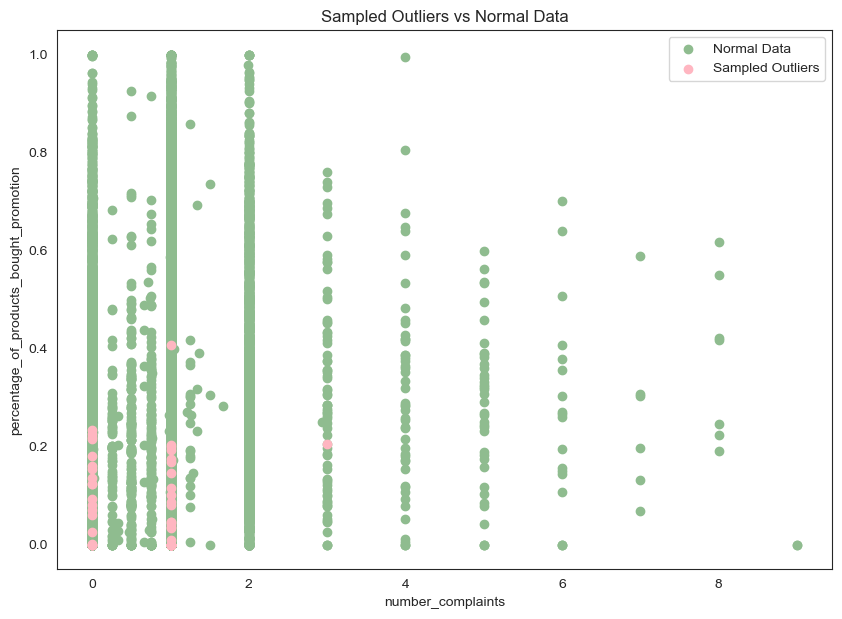

In [59]:
visualize_outliers_vs_normal(persons_with_outliers, sample_outliers, 'number_complaints', 'percentage_of_products_bought_promotion')

##### **Potential Anomaly:**  
- **Low Number of Complaints and Promotion Purchases:** This could indicate a group of customers who do not complain but have unusual purchasing behavior regarding promotions.
- **Extreme Values:** These points could represent customers with highly atypical buying patterns, such as buying a high proportion of promotional items without registering complaints.

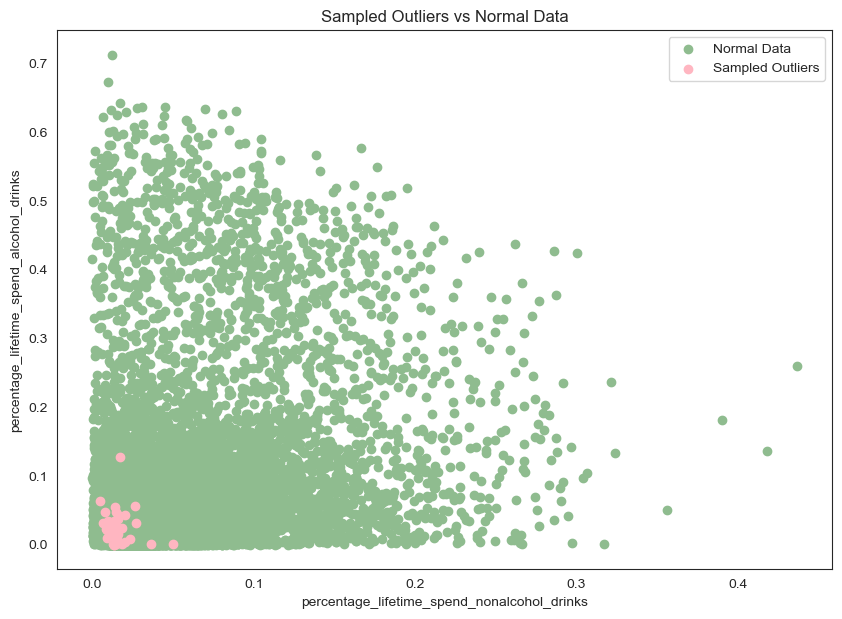

In [60]:
visualize_outliers_vs_normal(persons_with_outliers, sample_outliers, 'percentage_lifetime_spend_nonalcohol_drinks', 'percentage_lifetime_spend_alcohol_drinks')

#####  **Potential Anomaly:**  
- **Low Spending on Both Drink Types:** This could indicate a group of customers with atypical drinking behaviors, possibly due to lifestyle choices or dietary restrictions.

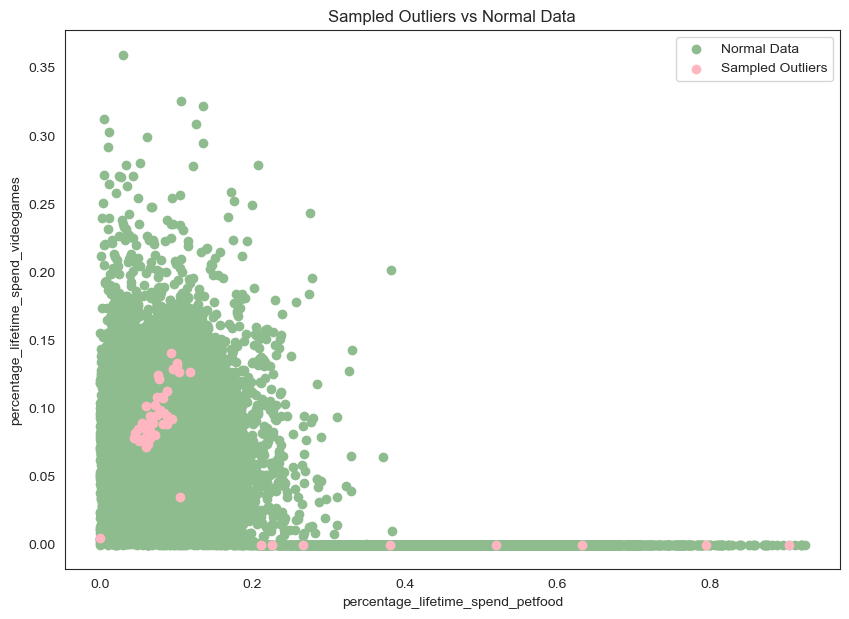

In [61]:
visualize_outliers_vs_normal(persons_with_outliers, sample_outliers, 'percentage_lifetime_spend_petfood', 'percentage_lifetime_spend_videogames')

##### **Potential Anomaly:**  
- **Low Spending on Both Pet Food and Video Games:** This could indicate customers who do not spend much on either pet food or video games, which might be atypical compared to the normal spending patterns.
- **Extreme Values for Pet Food Spending:** These points could represent customers with highly atypical buying patterns, such as buying a high proportion of promotional items without registering complaints.

Across the **different plots**, outliers consistently exhibit low spending values in multiple categories, suggesting they could be from **specific customer segments** or represent **data errors**.

# **8. Extracting the Data**

In [62]:
#persons_imputed.to_csv('Data/persons.csv')
#fishy.to_csv('Data/fishy.csv')
#persons.to_csv('Data/persons_all_columns.csv')